# Setting up

In [61]:
!pip install climate_indices mglearn
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
cd /content/drive/My\ Drive/DroughtprojectFiles

/content/drive/My Drive/DroughtprojectFiles


In [85]:
#import sys, os, statsmodels
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_error
import pandas as pd
import datetime
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
#import sys
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RANSACRegressor, TheilSenRegressor
from sklearn.svm import SVR
import scipy.stats as sp
import mglearn
from climate_indices import compute, indices


data_year_start_monthly = 1995
data_year_end_monthly = 2017

## Load Data

In [64]:
Ba_dataset = pd.read_csv('Balehonnur.csv',index_col=0, parse_dates=True, squeeze=True)
Ba_dataset['Date'] = pd.to_datetime(Ba_dataset[['Year', 'Month', 'Day']],errors='coerce')
Ba_dataset = Ba_dataset.set_index(Ba_dataset['Date'])
Ba_dataset = Ba_dataset.drop(Ba_dataset.columns[[0,1,2,4]], axis=1)
Ba_dataset = Ba_dataset.fillna(0)
#Ba_dataset = Ba_dataset.replace(0, Ba_dataset.mean())
Ba_dataset.head()

# ########Rattihalli Ba_dataset############
Ra_dataset = pd.read_csv('Rattihalli.csv',index_col=0, parse_dates=True, squeeze=True)
Ra_dataset['Date'] = pd.to_datetime(Ra_dataset[['Year', 'Month', 'Day']],errors='coerce')
Ra_dataset = Ra_dataset.set_index(Ra_dataset['Date'])
Ra_dataset = Ra_dataset.drop(Ra_dataset.columns[[0,1,2,4]], axis=1)
Ra_dataset = Ra_dataset.fillna(0)
#Ra_dataset = Ra_dataset.replace(0, Ra_dataset.mean())
Ra_dataset.head()

########Rattihalli Ba_dataset############
Ho_dataset = pd.read_csv('Hosaritti.csv',index_col=0, parse_dates=True, squeeze=True)
Ho_dataset['Date'] = pd.to_datetime(Ho_dataset[['Year', 'Month', 'Day']],errors='coerce')
Ho_dataset = Ho_dataset.set_index(Ho_dataset['Date'])
Ho_dataset = Ho_dataset.drop(Ho_dataset.columns[[0,1,2,4]], axis=1)
Ho_dataset = Ho_dataset.fillna(0)
#Ho_dataset = Ho_dataset.replace(0, Ho_dataset.mean())
Ho_dataset.head()

,Item
Date,
1994-06-01,0.0
1994-06-02,0.0
1994-06-03,0.0
1994-06-04,0.0
1994-06-05,0.0


In [65]:
Ba_pdataset = pd.read_csv('Balehonnur_rain.csv',index_col=0, parse_dates=True, squeeze=True)
Ba_pdataset['Date'] = pd.to_datetime(Ba_pdataset[['Year', 'Month', 'Day']],errors='coerce')
Ba_pdataset = Ba_pdataset.set_index(Ba_pdataset['Date'])
Ba_pdataset = Ba_pdataset.drop(Ba_pdataset.columns[[0,1,2,4]], axis=1)
Ba_pdataset = Ba_pdataset.fillna(0)
Ba_pdataset = Ba_pdataset.replace(0, Ba_pdataset.mean())
Ba_pdataset.head()

###########Rattihalli Dataset
Ra_pdataset = pd.read_csv('Rattihalli_rain.csv',index_col=0, parse_dates=True, squeeze=True)
Ra_pdataset['Date'] = pd.to_datetime(Ra_pdataset[['Year', 'Month', 'Day']],errors='coerce')
Ra_pdataset = Ra_pdataset.set_index(Ra_pdataset['Date'])
Ra_pdataset = Ra_pdataset.drop(Ra_pdataset.columns[[0,1,2,4]], axis=1)
Ra_pdataset = Ra_pdataset.fillna(0)
Ra_pdataset = Ra_pdataset.replace(0, Ra_pdataset.mean())
Ra_pdataset.head()

###########Rattihalli Dataset
Ho_pdataset = pd.read_csv('Hosaritti_rain.csv',index_col=0, parse_dates=True, squeeze=True)
Ho_pdataset['Date'] = pd.to_datetime(Ho_pdataset[['Year', 'Month', 'Day']],errors='coerce')
Ho_pdataset = Ho_pdataset.set_index(Ho_pdataset['Date'])
Ho_pdataset = Ho_pdataset.drop(Ho_pdataset.columns[[0,1,2,4]], axis=1)
Ho_pdataset = Ho_pdataset.fillna(0)
Ho_pdataset = Ho_pdataset.replace(0, Ho_pdataset.mean())
Ho_pdataset.head()

Ba_dataset = Ba_dataset.loc['2005-06-01': '2017-05-31']
Ho_dataset = Ho_dataset.loc['2005-06-01': '2017-05-31']
Ra_dataset = Ra_dataset.loc['2005-06-01': '2017-05-31']

Ba_pdataset = Ba_pdataset.loc['2005-06-01': '2017-05-31']
Ho_pdataset = Ho_pdataset.loc['2005-06-01': '2017-05-31']
Ra_pdataset = Ra_pdataset.loc['2005-06-01': '2017-05-31']
Ra_pdataset.head()

,Data
Date,
2005-06-01,10.000000
2005-06-02,20.200000
2005-06-03,2.023687
2005-06-04,1.100000
2005-06-05,2.023687


# Data Analysis

In [66]:

Ra_dataset_monthly_mean = Ra_dataset['Item'].resample('M').mean()
Ra_D_Q = Ra_dataset_monthly_mean.loc['2011-06-01': '2014-05-31']

Ba_D_WT = np.array([27,26,26,27,27,27,26,25,26,27,27,27,27,26,24,26,26,26,26,26,24,28,30,29,28,24,26,24,25,29,28,29,33,30,34,32])
Ho_D_WT = np.array([28,24,25,26,26,26,27,29,27,27,28,32,26,25,23,25,28,27,26,25,26,28,26,29,27,25,22,26,26,26,26,24,27,26,30,24])
Ra_D_WT = np.array([26,26,24.8,26,25,25,26,29,27,26,30,28,27,25,23,26,28,27,25,25,28,28,26,28,29,25,24,26,26,25,25,25,27,26,30,25])

Ba_dataset_monthly_mean = Ba_dataset['Item'].resample('M').mean()
Ba_D_Q123_Drought = Ba_dataset_monthly_mean.loc['2012-06-01': '2013-05-31']
Ba_D_Q123_Drought.mean()

54.25838360439931

2020-11-07  10:16:05 WARNING No handles with labels found to put in legend.


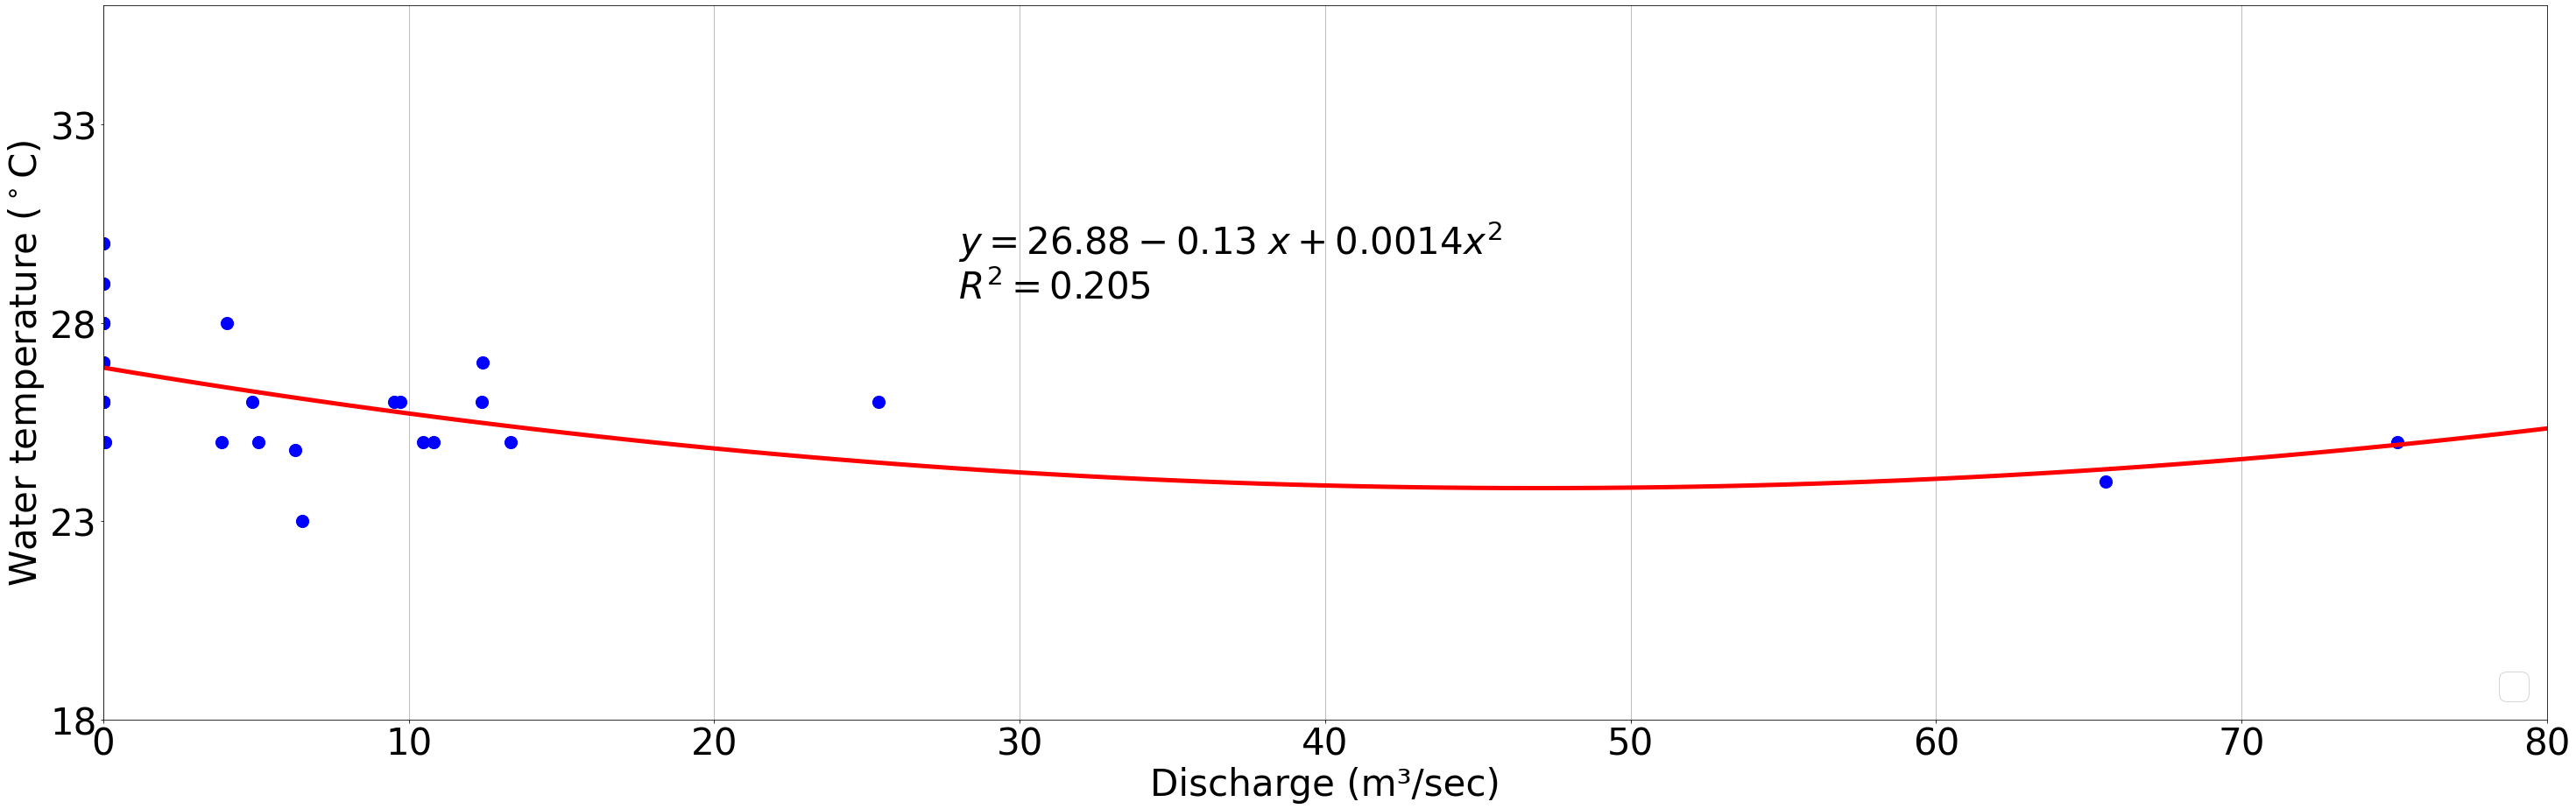

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)

fig, ax = plt.subplots(figsize=(50, 15))
ax.xaxis.grid()

plt.scatter(Ra_D_Q, Ra_D_WT,s=200, c='b', marker='o')
plt.ylabel('Water temperature ($^\circ$C)', fontsize=42)
plt.xlabel('Discharge (m\N{SUPERSCRIPT THREE}/sec)', fontsize=42)
plt.tick_params(labelsize=42)
plt.legend(loc='lower right',fontsize=42)

z = np.polyfit(Ra_D_Q, Ra_D_WT, 2)
y_hat = np.poly1d(z)(Ra_D_Q)
y = Ra_D_WT
X_quad = quadratic.fit_transform(Ra_D_Q.values.reshape(-1, 1))
X_fit = np.arange(-10, X_quad.max(), 1)[:, np.newaxis]
 
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
plt.yticks(np.arange(18, 36, 5))
ax.set_xlim(0, 80)
ax.set_ylim(18, 36,5)
plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=5,
         linestyle='-')

text = f"$y=26.88 - 0.13\;x + 0.0014x^2$\n$R^2 = {r2_score(Ra_D_WT,y_hat):0.3f}$"
plt.gca().text(0.35, 0.65, text,transform=plt.gca().transAxes,fontsize=42, verticalalignment='center_baseline')

plt.show()

In [68]:
Ba_dataset_monthly_mean = Ba_dataset['Item'].resample('M').mean()
Ba_D_Q = Ba_dataset_monthly_mean.loc['2011-06-01': '2014-05-31']

Ho_dataset_monthly_mean = Ho_dataset['Item'].resample('M').mean()
Ho_D_Q = Ho_dataset_monthly_mean.loc['2011-06-01': '2014-05-31']

Ra_dataset_monthly_mean = Ra_dataset['Item'].resample('M').mean()
Ra_D_Q = Ra_dataset_monthly_mean.loc['2011-06-01': '2014-05-31']

Ra_D_NT = np.array([0.80,0.50,0.80,0.80,0.90,0.95,0,0,0,0,0.13,0.10,0.14,0.10,0.16,0.10,0.20,0.20,0.10,0.20,0.22,0.10,0.15,0.08,0.08,0.10,0.08,0,0.20,0.21,0.12,0.13,0.13,0.10,0.1,0.1])
Ba_D_NT = np.array([0.90,1.0,1.5,1.0,1.5,1.7,1.0,1.9,0.4,0.56,0.80,1.8,0.60,0.40,0.20,0.25,0.28,0.40,0.10,0.20,0.25,0.20,0.20,0.20,0.25,0.30,0.10,1.00,0.25,0.15,0.22,0.44,0.20,0.20,0.15,0.25])
Ho_D_NT = np.array([1.25,1.0,1.8,1.2,1.0,1.2,0,1.10,1.8,1.4,0.10,0.30,0.14,0.10,0.12,0.30,0.30,0.20,0.10,0.03,0,0.10,0.2,0.2,0.1,0.13,0.1,0,0.16,0.2,0.33,0.25,0.17,0.2,0.2,0.2])


2020-11-07  10:16:11 WARNING No handles with labels found to put in legend.


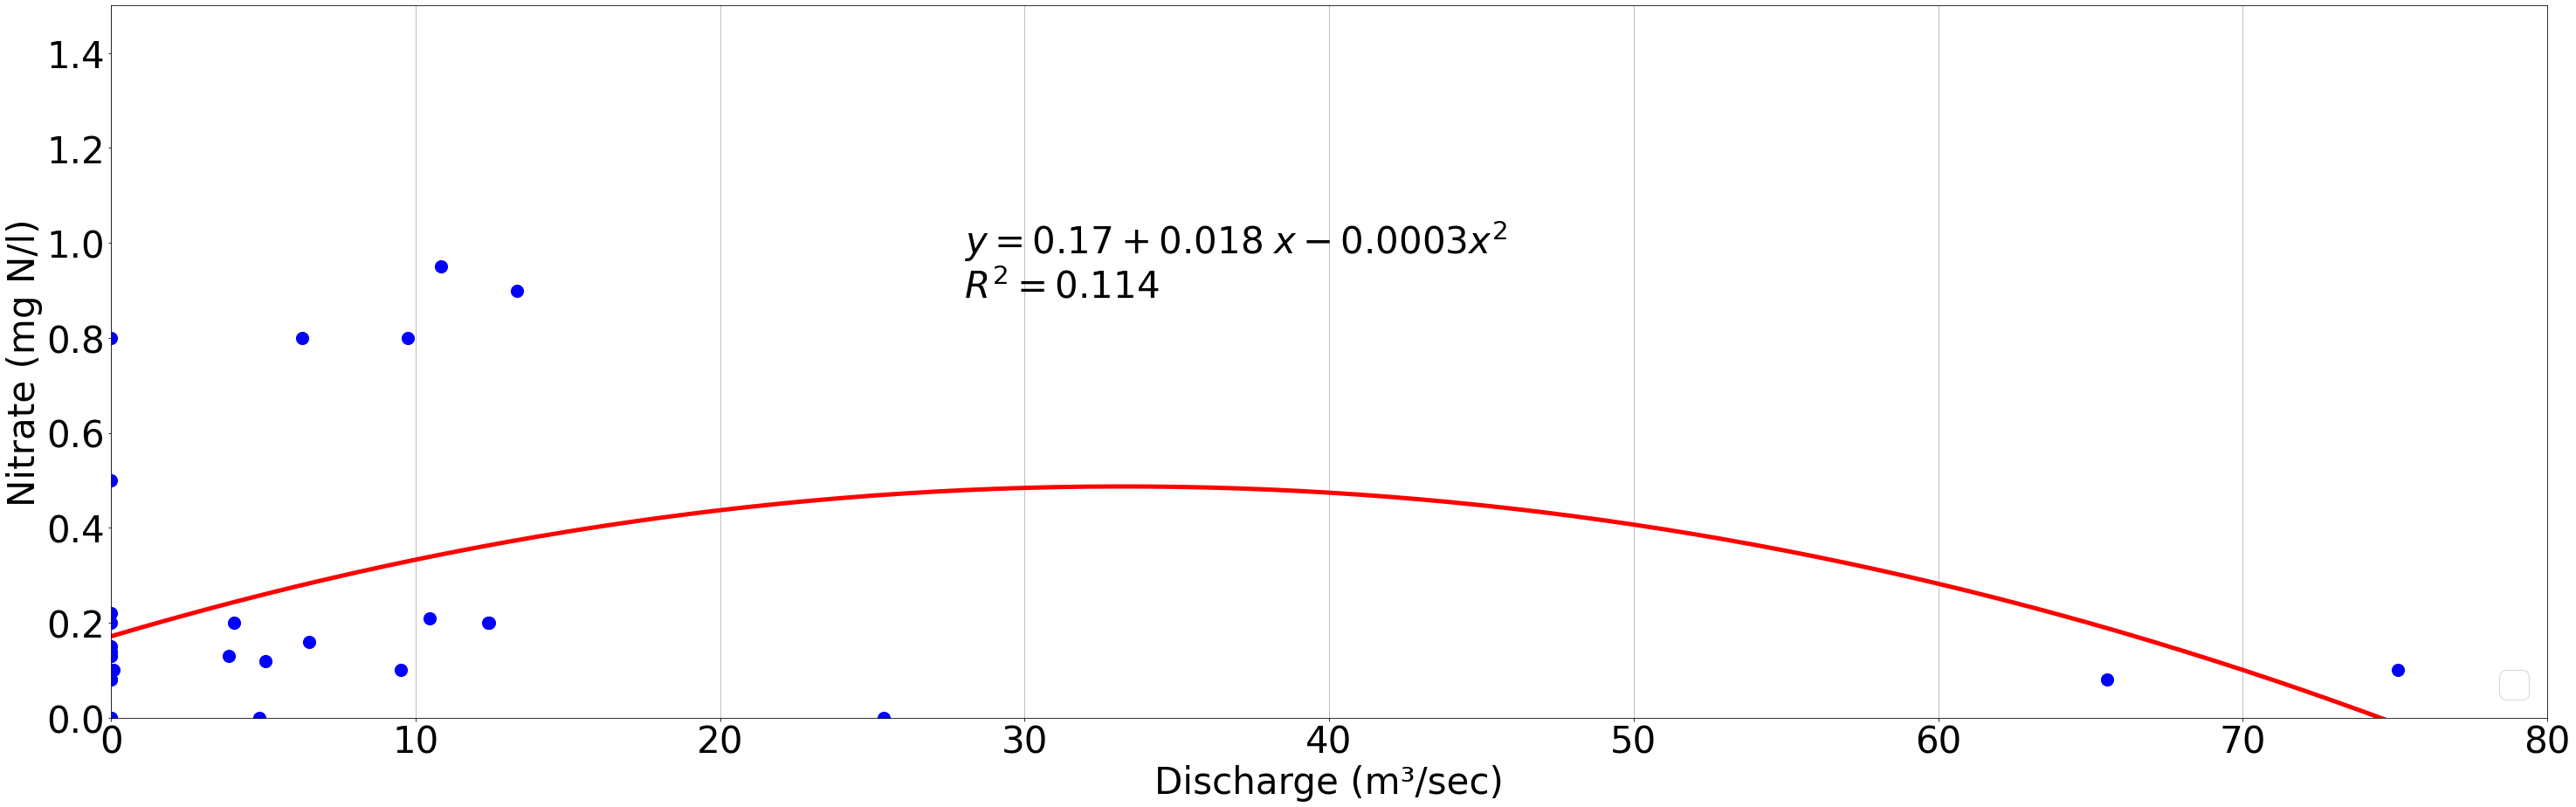

In [69]:
fig, ax = plt.subplots(figsize=(50, 15))
ax.xaxis.grid()

plt.scatter(Ra_D_Q, Ra_D_NT,s=200, c='b', marker='o')
plt.ylabel('Nitrate (mg N/l)', fontsize=42)
plt.xlabel('Discharge (m\N{SUPERSCRIPT THREE}/sec)', fontsize=42)
plt.tick_params(labelsize=42)
plt.legend(loc='lower right',fontsize=42)
z = np.polyfit(Ra_D_Q, Ra_D_NT, 2)
y_hat = np.poly1d(z)(Ra_D_Q)

#plt.plot(Ra_D_Q, y_hat, "r", lw=5)


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)

y = Ra_D_NT
X_quad = quadratic.fit_transform(Ra_D_Q.values.reshape(-1, 1))
X_fit = np.arange(-10, X_quad.max(), 1)[:, np.newaxis]
 
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
#plt.yticks(np.arange(18, 36, 5))
ax.set_xlim(0, 80,20)
ax.set_ylim(0, 1.5,0.5)
plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=5,
         linestyle='-')


text = f"$y=0.17 + 0.018\;x - 0.0003x^2$\n$R^2 = {r2_score(Ra_D_NT,y_hat):0.3f}$"
plt.gca().text(0.35, 0.65, text,transform=plt.gca().transAxes,fontsize=42, verticalalignment='center_baseline')

plt.show()


2020-11-07  10:16:15 WARNING No handles with labels found to put in legend.


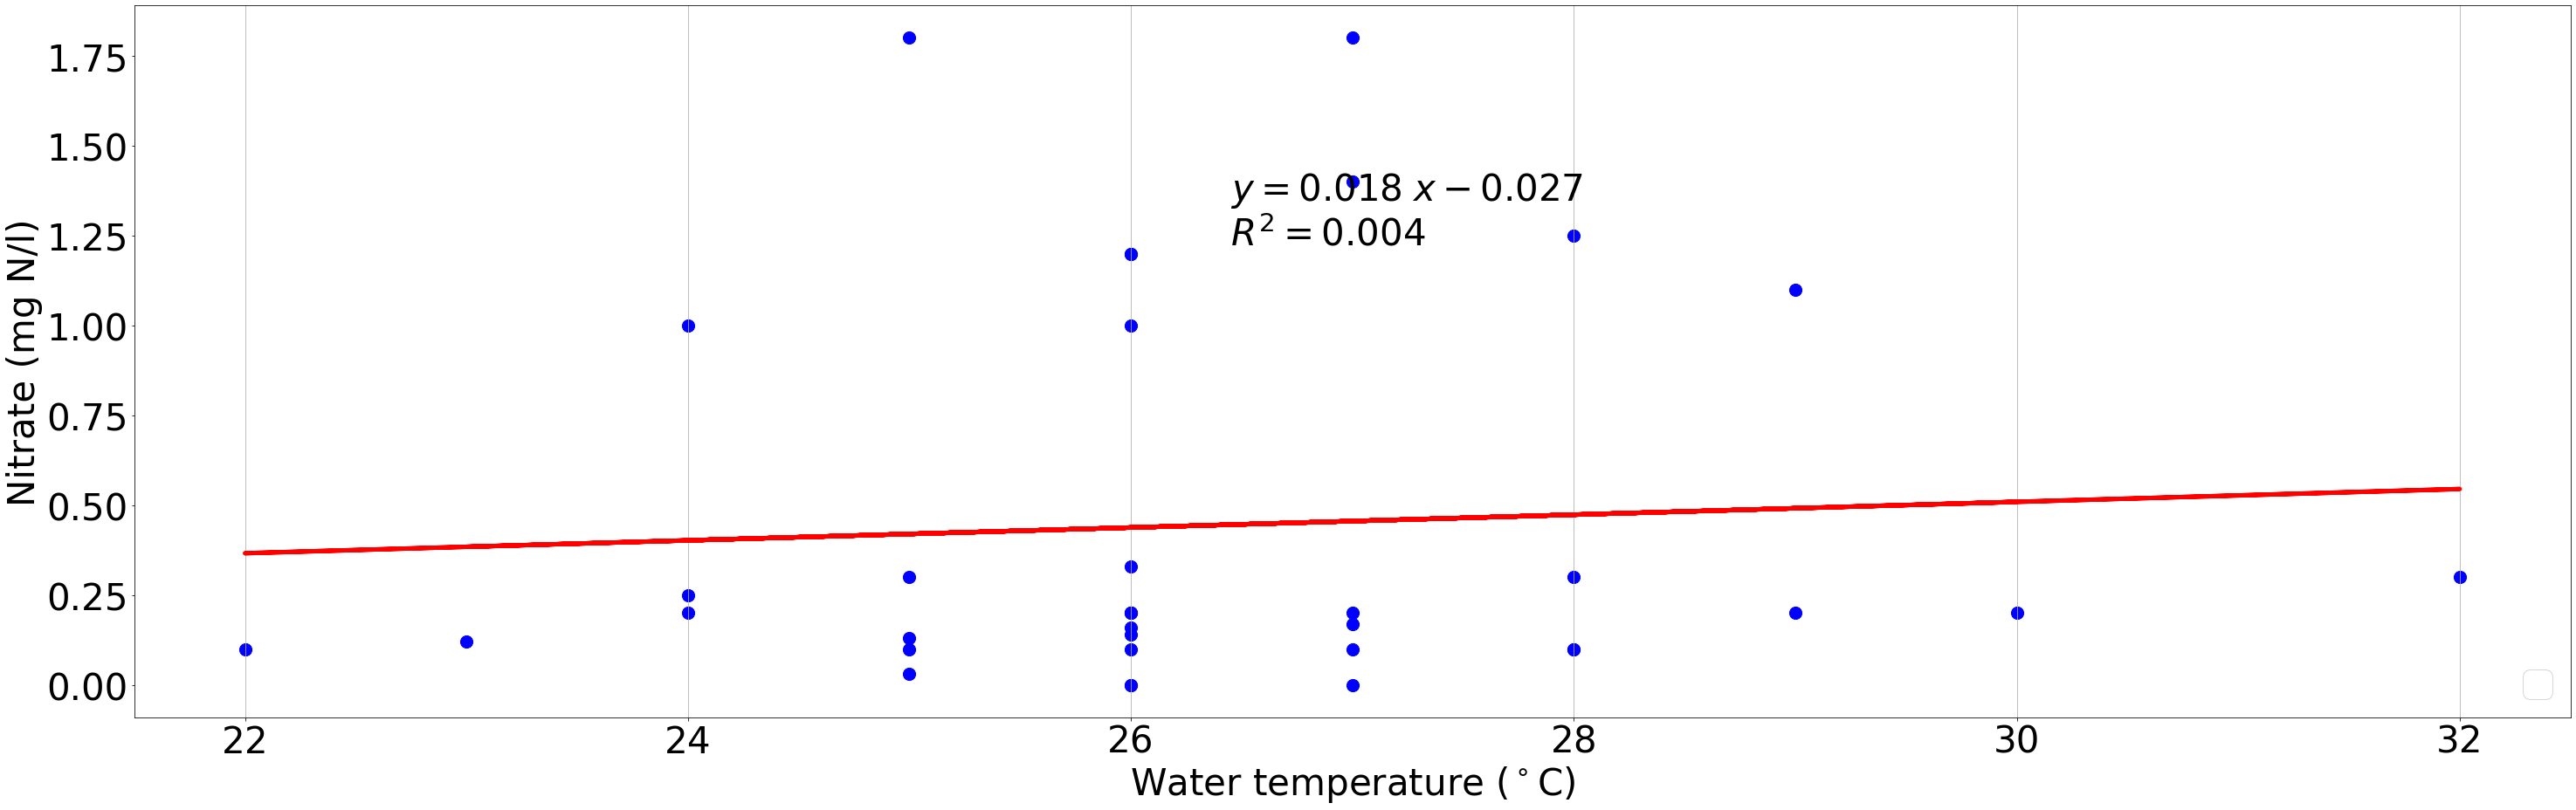

In [70]:
fig, ax = plt.subplots(figsize=(50, 15))
ax.xaxis.grid()

plt.scatter(Ho_D_WT,Ho_D_NT,s=200, c='b', marker='o')
plt.xlabel('Water temperature ($^\circ$C)', fontsize=42)
plt.ylabel('Nitrate (mg N/l)', fontsize=42)
plt.tick_params(labelsize=42)
plt.legend(loc='lower right',fontsize=42)
z = np.polyfit(Ho_D_WT,Ho_D_NT, 1)
y_hat = np.poly1d(z)(Ho_D_WT)

plt.plot(Ho_D_WT, y_hat, "r", lw=5)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(Ho_D_NT,y_hat):0.3f}$"
plt.gca().text(0.45, 0.72, text,transform=plt.gca().transAxes,fontsize=42, verticalalignment='center_baseline')
plt.show()




In [71]:
Ra_D_PH = np.array([7.4,6.9,7.6,7.2,7.7,7.4,8.10,8.0,7.8,8.1,8.2,8.7,9.10,6.0,8.4,8.1,8.4,8.4,8.5,9.2,9.2,8.3,8.5,8.3,8.4,8.3,7.6,8.1,8.3,8.6,8.6,8.6,8.3,8.5,8.1,7.5])
Ba_D_PH = np.array([7.3,7.3,7.1,7.5,7.6,7.7,7.7,7.9,7.3,7.4,7.8,8.2,7.9,7.6,7.7,7.8,7.9,7.7,7.0,8.3,8.2,7.6,7.5,8.0,7.8,8.2,8.2,7.5,8.2,8.4,7.6,8.5,8.2,8.1,7.6,7.5])
Ho_D_PH = np.array([7.5,6.9,7.6,7.8,7.9,8.5,8.4,7.3,7.4,8.2,8.20,8.80,9.0,8.0,7.2,8.9,8.50,8.4,8.8,9.2,0,8.9,8.5,8.4,8.4,8.0,7.7,8.2,8.4,8.7,8.6,8.2,8.6,8.4,8,7.4])



2020-11-07  10:16:20 WARNING No handles with labels found to put in legend.


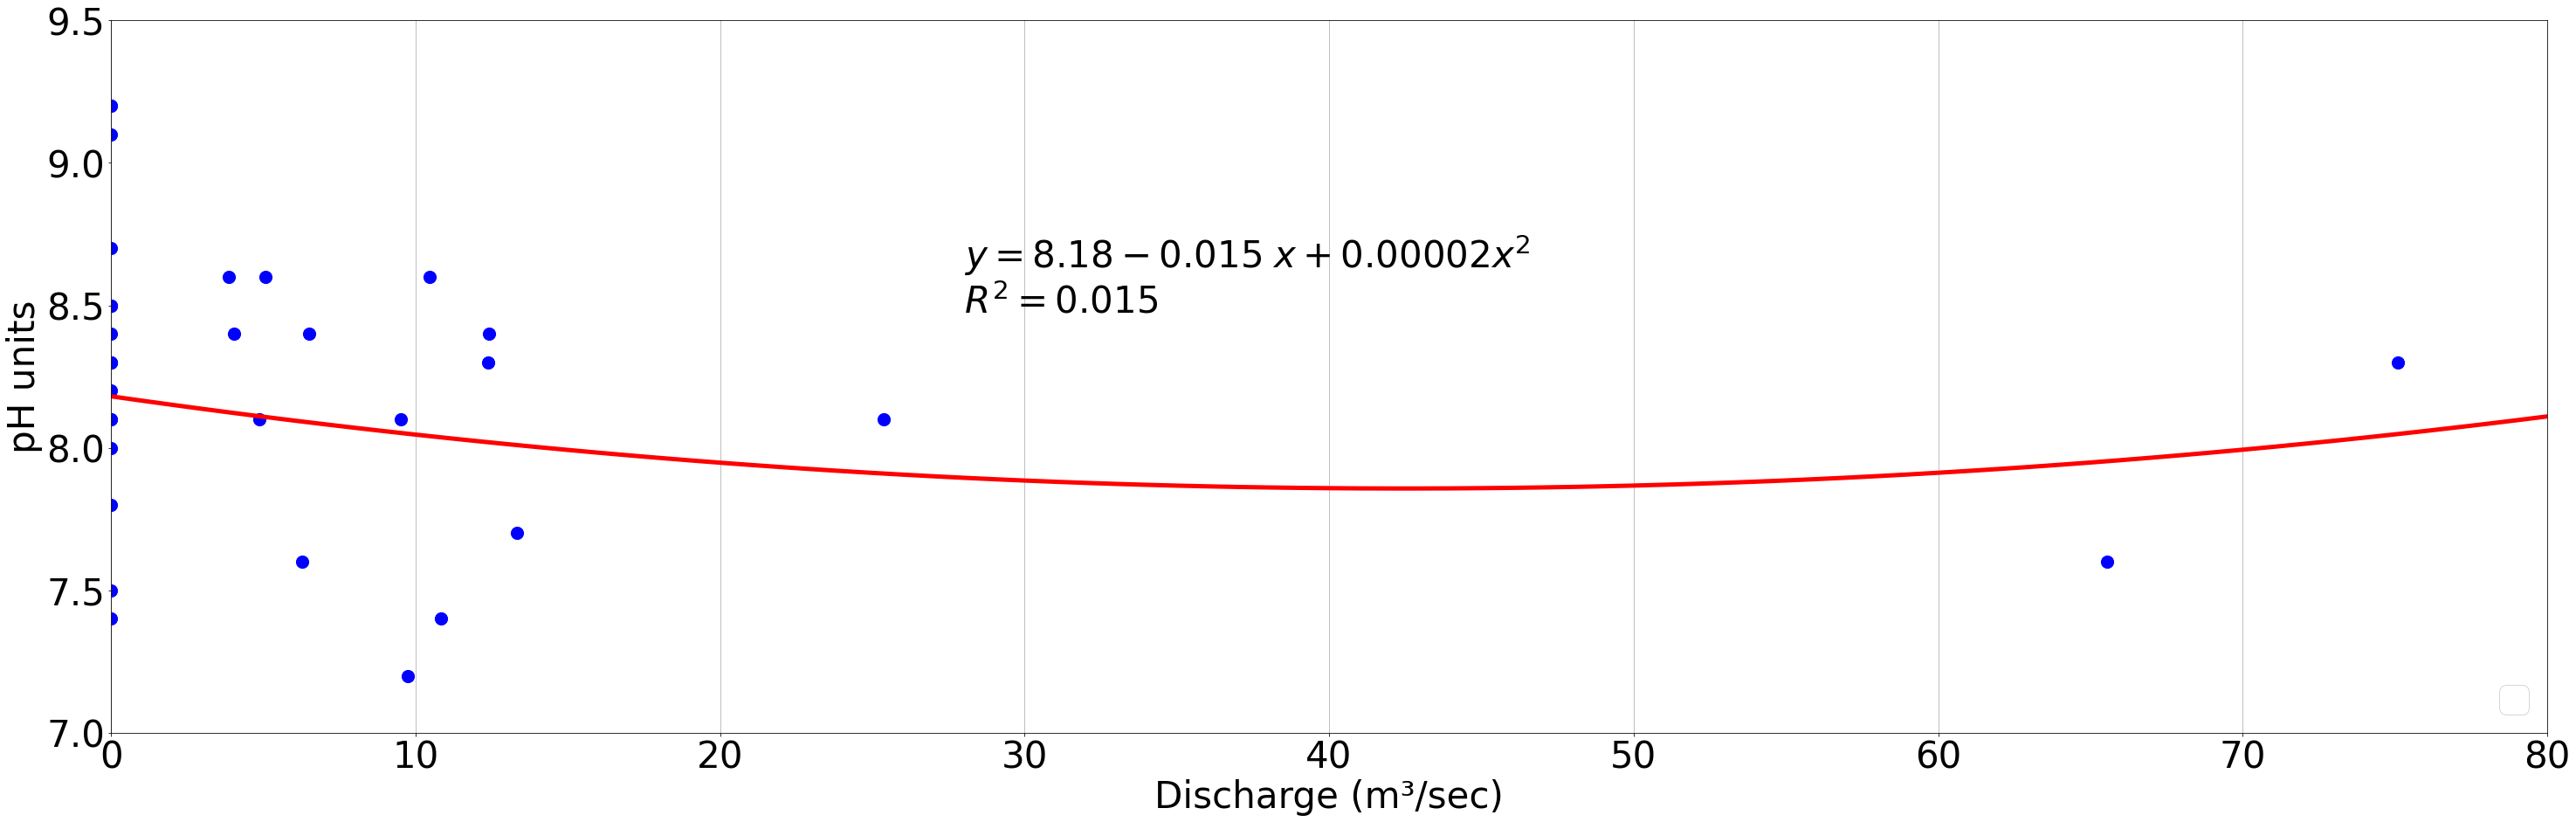

In [72]:
fig, ax = plt.subplots(figsize=(50, 15))
ax.xaxis.grid()

plt.scatter(Ra_D_Q, Ra_D_PH,s=200, c='b', marker='o')
plt.ylabel('pH units', fontsize=42)
plt.xlabel('Discharge (m\N{SUPERSCRIPT THREE}/sec)', fontsize=42)
plt.tick_params(labelsize=42)
plt.legend(loc='lower right',fontsize=42)
z = np.polyfit(Ra_D_Q, Ra_D_PH, 2)
y_hat = np.poly1d(z)(Ra_D_Q)

#plt.plot(Ra_D_Q, y_hat, "r", lw=5)


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)

y = Ra_D_PH
X_quad = quadratic.fit_transform(Ra_D_Q.values.reshape(-1, 1))
X_fit = np.arange(-10, X_quad.max(), 1)[:, np.newaxis]
 
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
#plt.yticks(np.arange(18, 36, 5))
ax.set_xlim(0, 80,20)
ax.set_ylim(7, 9.5,1)
plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=5,
         linestyle='-')


text = f"$y=8.18 - 0.015\;x + 0.00002x^2$\n$R^2 = {r2_score(Ra_D_PH,y_hat):0.3f}$"
plt.gca().text(0.35, 0.65, text,transform=plt.gca().transAxes,fontsize=42, verticalalignment='center_baseline')

plt.show()


In [73]:
Ra_D_DO = np.array([7.1,6.8,6.7,7.2,7.2,7.3,7.30,8.30,7.8,7.9,7.2,7.6,6.0,6.2,5.2,7.4,7.3,7.4,7.3,7.2,7.0,7.2,7.3,7.2,6.9,6.4,7.2,7.4,7.4,7.5,7.6,6.3,7.1,7.6,7.1,6.9])
Ba_D_DO = np.array([7.0,7.1,7.0,7.1,7.0,6.9,6.8,6.8,6.9,7.0,6.9,6.9,6.8,6.9,6.7,6.9,6.9,6.9,6.1,6.1,6.1,6.8,6.6,7.0,6.8,6.6,6.4,6.4,6.5,6.1,6.0,6.1,6.0,6.8,6.7,5.9])
Ho_D_DO = np.array([7.2,7.2,7.0,7.2,7.2,7.3,7.3,8.3,9.8,7.9,7.3,7.5,6.2,6.4,5.2,7.4,7.3,7.4,7.2,7.4,0,7.3,7.4,6.9,6.9,6.6,7.2,7.4,7.6,7.8,7.8,6.3,6.4,7.6,7.1,6])

2020-11-07  10:16:25 WARNING No handles with labels found to put in legend.


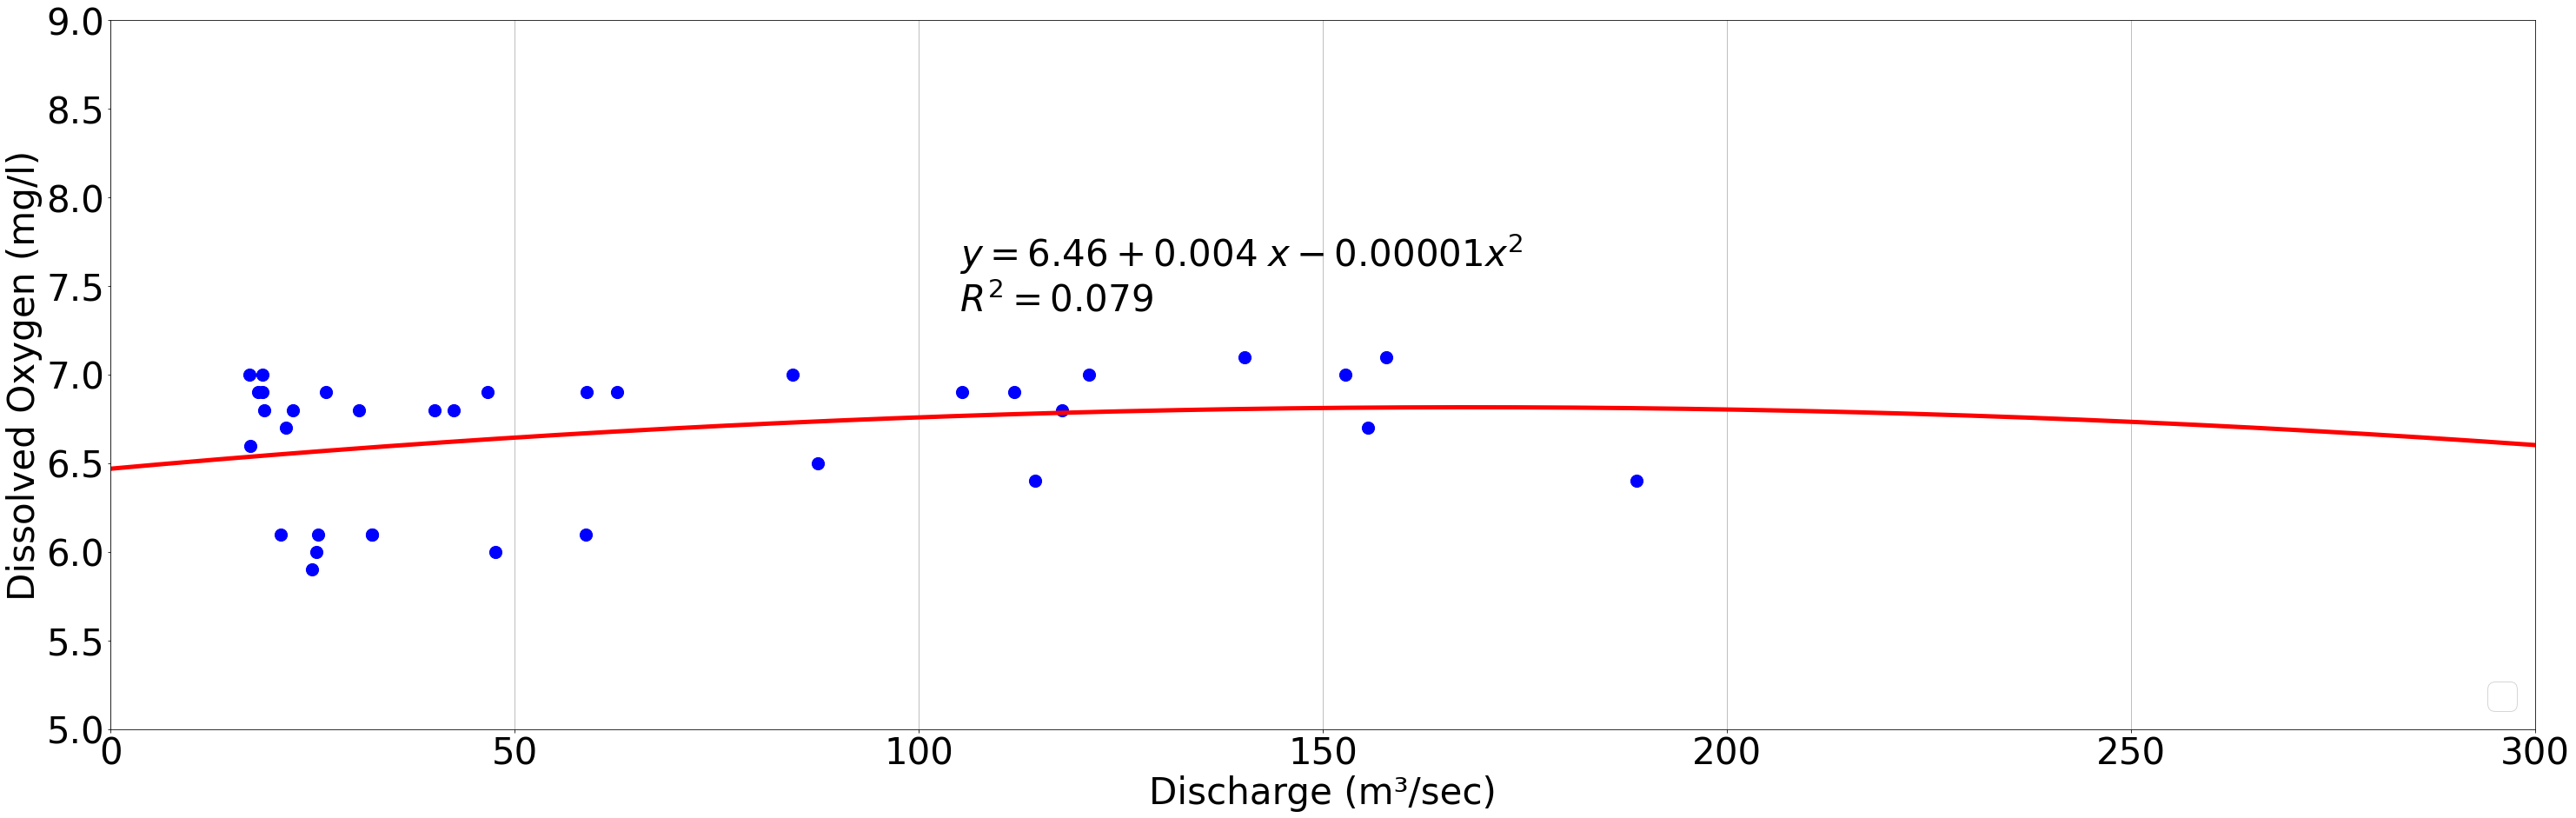

In [74]:
fig, ax = plt.subplots(figsize=(50, 15))
ax.xaxis.grid()

plt.scatter(Ba_D_Q, Ba_D_DO,s=200, c='b', marker='o')
plt.ylabel('Dissolved Oxygen (mg/l)', fontsize=42)
plt.xlabel('Discharge (m\N{SUPERSCRIPT THREE}/sec)', fontsize=42)
plt.tick_params(labelsize=42)
plt.legend(loc='lower right',fontsize=42)
z = np.polyfit(Ba_D_Q, Ba_D_DO, 2)
y_hat = np.poly1d(z)(Ba_D_Q)

#plt.plot(Ba_D_Q, y_hat, "r", lw=5)


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)

y = Ba_D_DO
X_quad = quadratic.fit_transform(Ba_D_Q.values.reshape(-1, 1))
X_fit = np.arange(-10, X_quad.max(), 1)[:, np.newaxis]
 
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
#plt.yticks(np.arange(18, 36, 5))
ax.set_xlim(0, 300,50)
ax.set_ylim(5, 9,1)
plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=5,
         linestyle='-')


text = f"$y=6.46 + 0.004\;x - 0.00001x^2$\n$R^2 = {r2_score(Ba_D_DO,y_hat):0.3f}$"
plt.gca().text(0.35, 0.65, text,transform=plt.gca().transAxes,fontsize=42, verticalalignment='center_baseline')

plt.show()


In [75]:
Ra_D_BOD = np.array([2.0,2.0,2.0,1.0,2.0,1.9,1.70,2.0,2.0,2.2,1.2,1.8,2.0,3.0,1.6,2.0,1.6,2.0,2.0,3.0,3.0,1.0,2.0,1.8,2.0,1.8,2.0,2.2,2.0,2.0,2.4,3.0,2.4,2.0,2.8,3])
Ba_D_BOD = np.array([3.0,2.0,3.0,2.0,2.5,3.0,2.8,3.30,3.30,3.0,3.5,4.0,4.0,3.0,2.0,3.0,3.0,4.0,6.0,5.0,3.0,3.0,5,4.0,3.0,2.0,1.7,3.0,5.0,5.0,3.0,3.0,2.0,3.0,3,3])
Ho_D_BOD = np.array([2.0,2.0,2.0,2.0,2.0,2.5,2.4,2.0,3.0,2.0,2.2,3.0,1.0,3.0,2.0,2.0,2.0,2.0,3.0,3.2,0,4.0,3.0,3.0,3.0,2.1,2.0,2.2,2.2,2.5,2.0,2.3,3.0,3.0,3,3])

2020-11-07  10:16:29 WARNING No handles with labels found to put in legend.


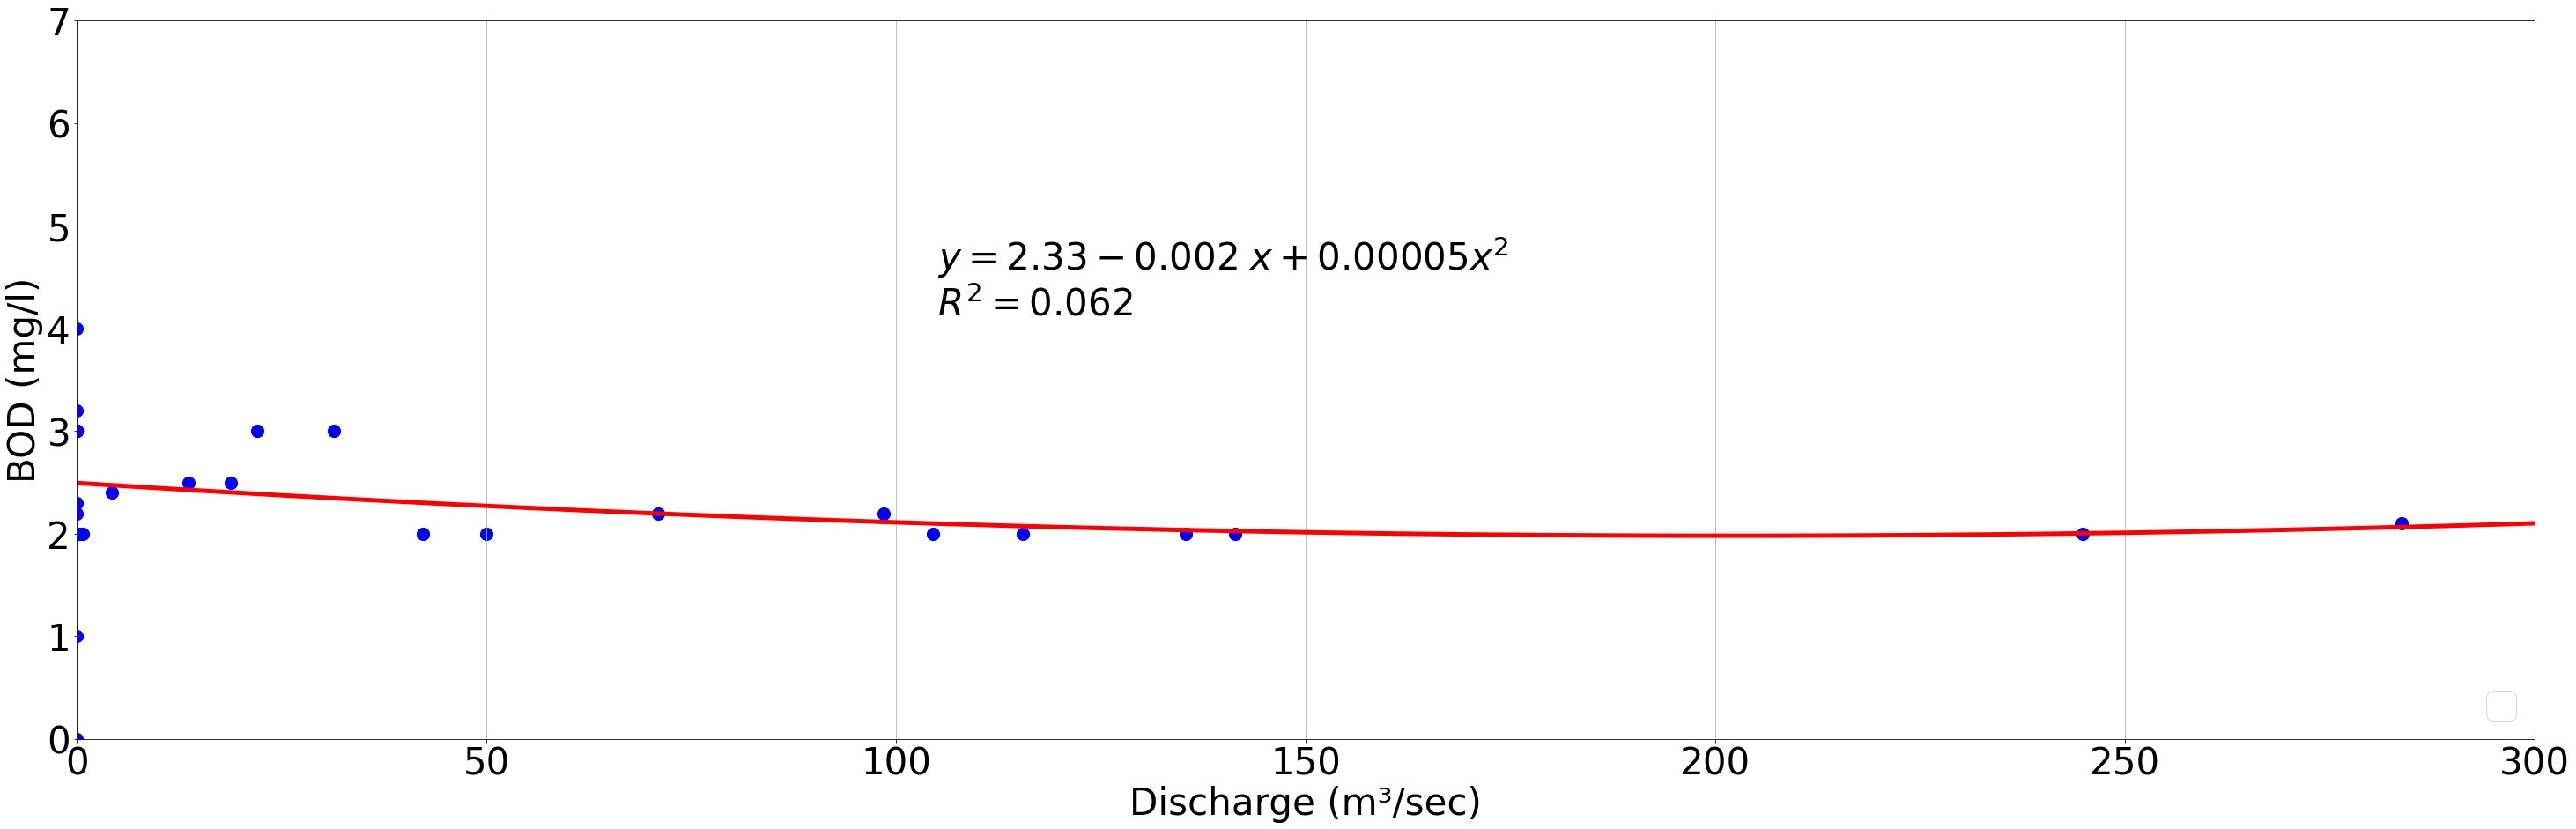

In [76]:
fig, ax = plt.subplots(figsize=(50, 15))
ax.xaxis.grid()

plt.scatter(Ho_D_Q, Ho_D_BOD,s=200, c='b', marker='o')
plt.ylabel('BOD (mg/l)', fontsize=42)
plt.xlabel('Discharge (m\N{SUPERSCRIPT THREE}/sec)', fontsize=42)
plt.tick_params(labelsize=42)
plt.legend(loc='lower right',fontsize=42)
z = np.polyfit(Ho_D_Q, Ho_D_BOD, 2)
y_hat = np.poly1d(z)(Ho_D_Q)

#plt.plot(Ho_D_Q, y_hat, "r", lw=5)


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)

y = Ho_D_BOD
X_quad = quadratic.fit_transform(Ho_D_Q.values.reshape(-1, 1))
X_fit = np.arange(-10, X_quad.max(), 1)[:, np.newaxis]
 
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
#plt.yticks(np.arange(18, 36, 5))
ax.set_xlim(0, 300,50)
ax.set_ylim(0, 7,1)
plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=5,
         linestyle='-')


text = f"$y=2.33 - 0.002\;x + 0.00005x^2$\n$R^2 = {r2_score(Ho_D_BOD,y_hat):0.3f}$"
plt.gca().text(0.35, 0.65, text,transform=plt.gca().transAxes,fontsize=42, verticalalignment='center_baseline')

plt.show()


# Precipitation & Discharge

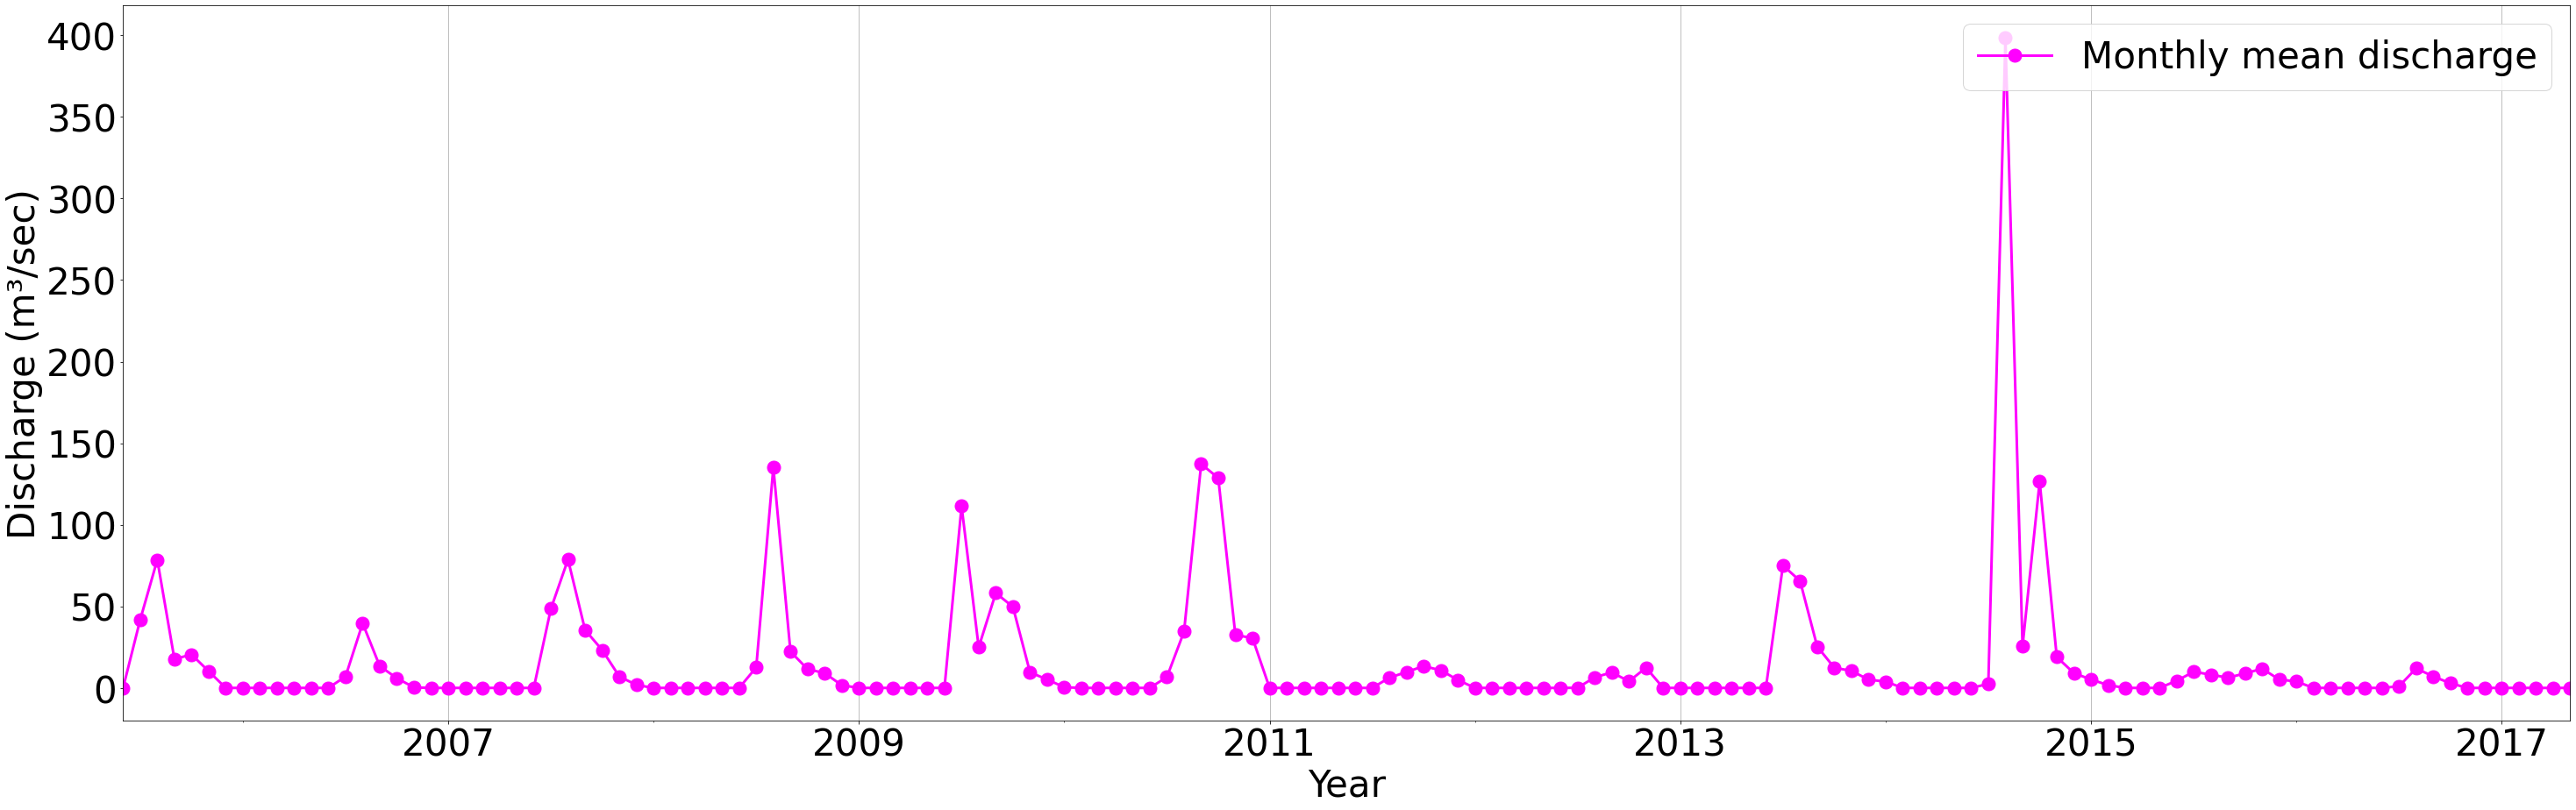

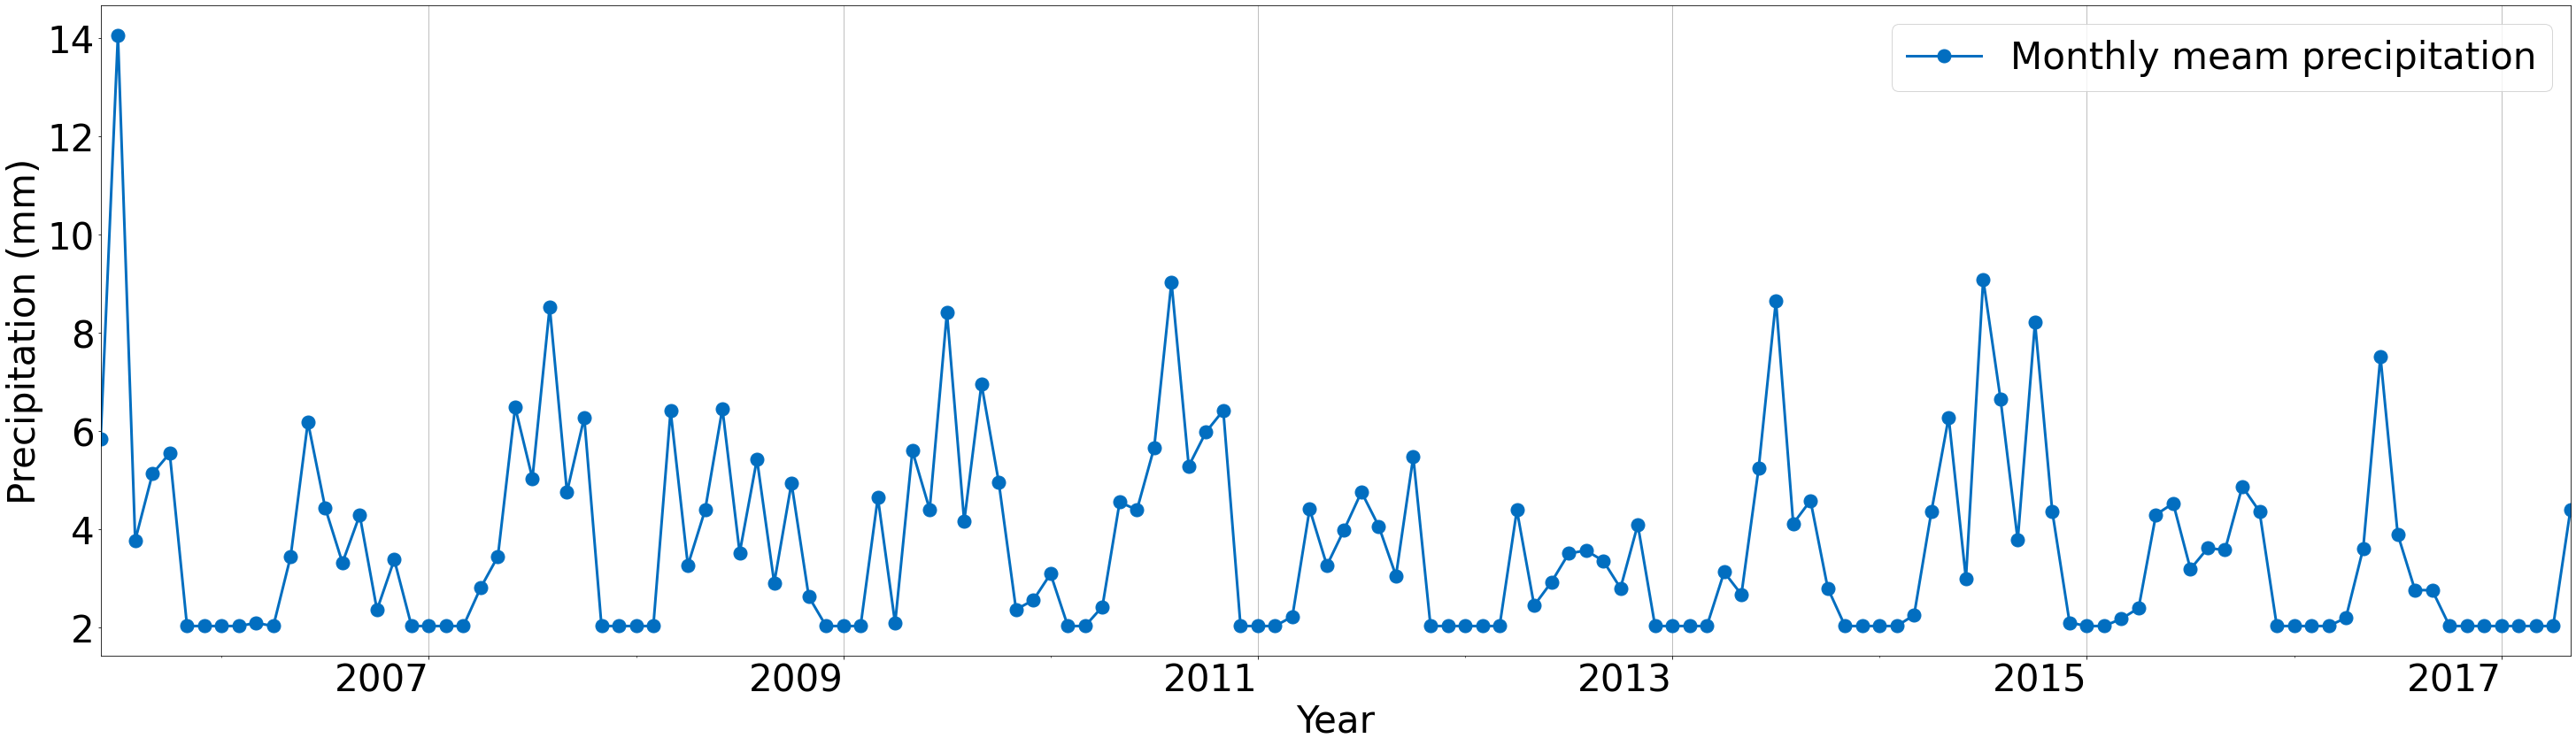

In [77]:
fig, ax = plt.subplots(figsize=(50, 15))
ax.xaxis.grid()

Ra_dataset['Item'].resample('M').mean().plot(ax=ax,marker='o',markersize=15,label='Monthly mean discharge', lw=3,color='#FF00FF')
#ax.set_xlim('01-06-1995', '31-05-2017')
ax.set_xlim('2005-06-01', '2017-05-31')
plt.ylabel('Discharge (m\N{SUPERSCRIPT THREE}/sec)', fontsize=42)
plt.xlabel('Year', fontsize=42)
plt.tick_params(labelsize=42)
plt.legend(loc='upper right',fontsize=42)
ax.xaxis.grid()
ax.xaxis.set_tick_params(rotation=0)
#fig.autofmt_xdate()
plt.show()

fig, ax1 = plt.subplots(figsize=(50, 15))
ax1.xaxis.grid()

fig.autofmt_xdate()
Ra_pdataset['Data'].resample('M').mean().plot(ax=ax1,marker='o',markersize=15,label='Monthly meam precipitation',lw=3,color='#026EC0')
#ax1.set_xlim('01-06-1995', '31-05-2017')
ax1.set_xlim('2005-06-01', '2017-05-31')
#plt.yticks(np.arange(20, 30, 2))
plt.ylabel('Precipitation (mm)', fontsize=42)
plt.xlabel('Year', fontsize=42)
plt.tick_params(labelsize=42)
ax1.xaxis.grid()
plt.legend(loc='upper right',fontsize=42)
plt.show()


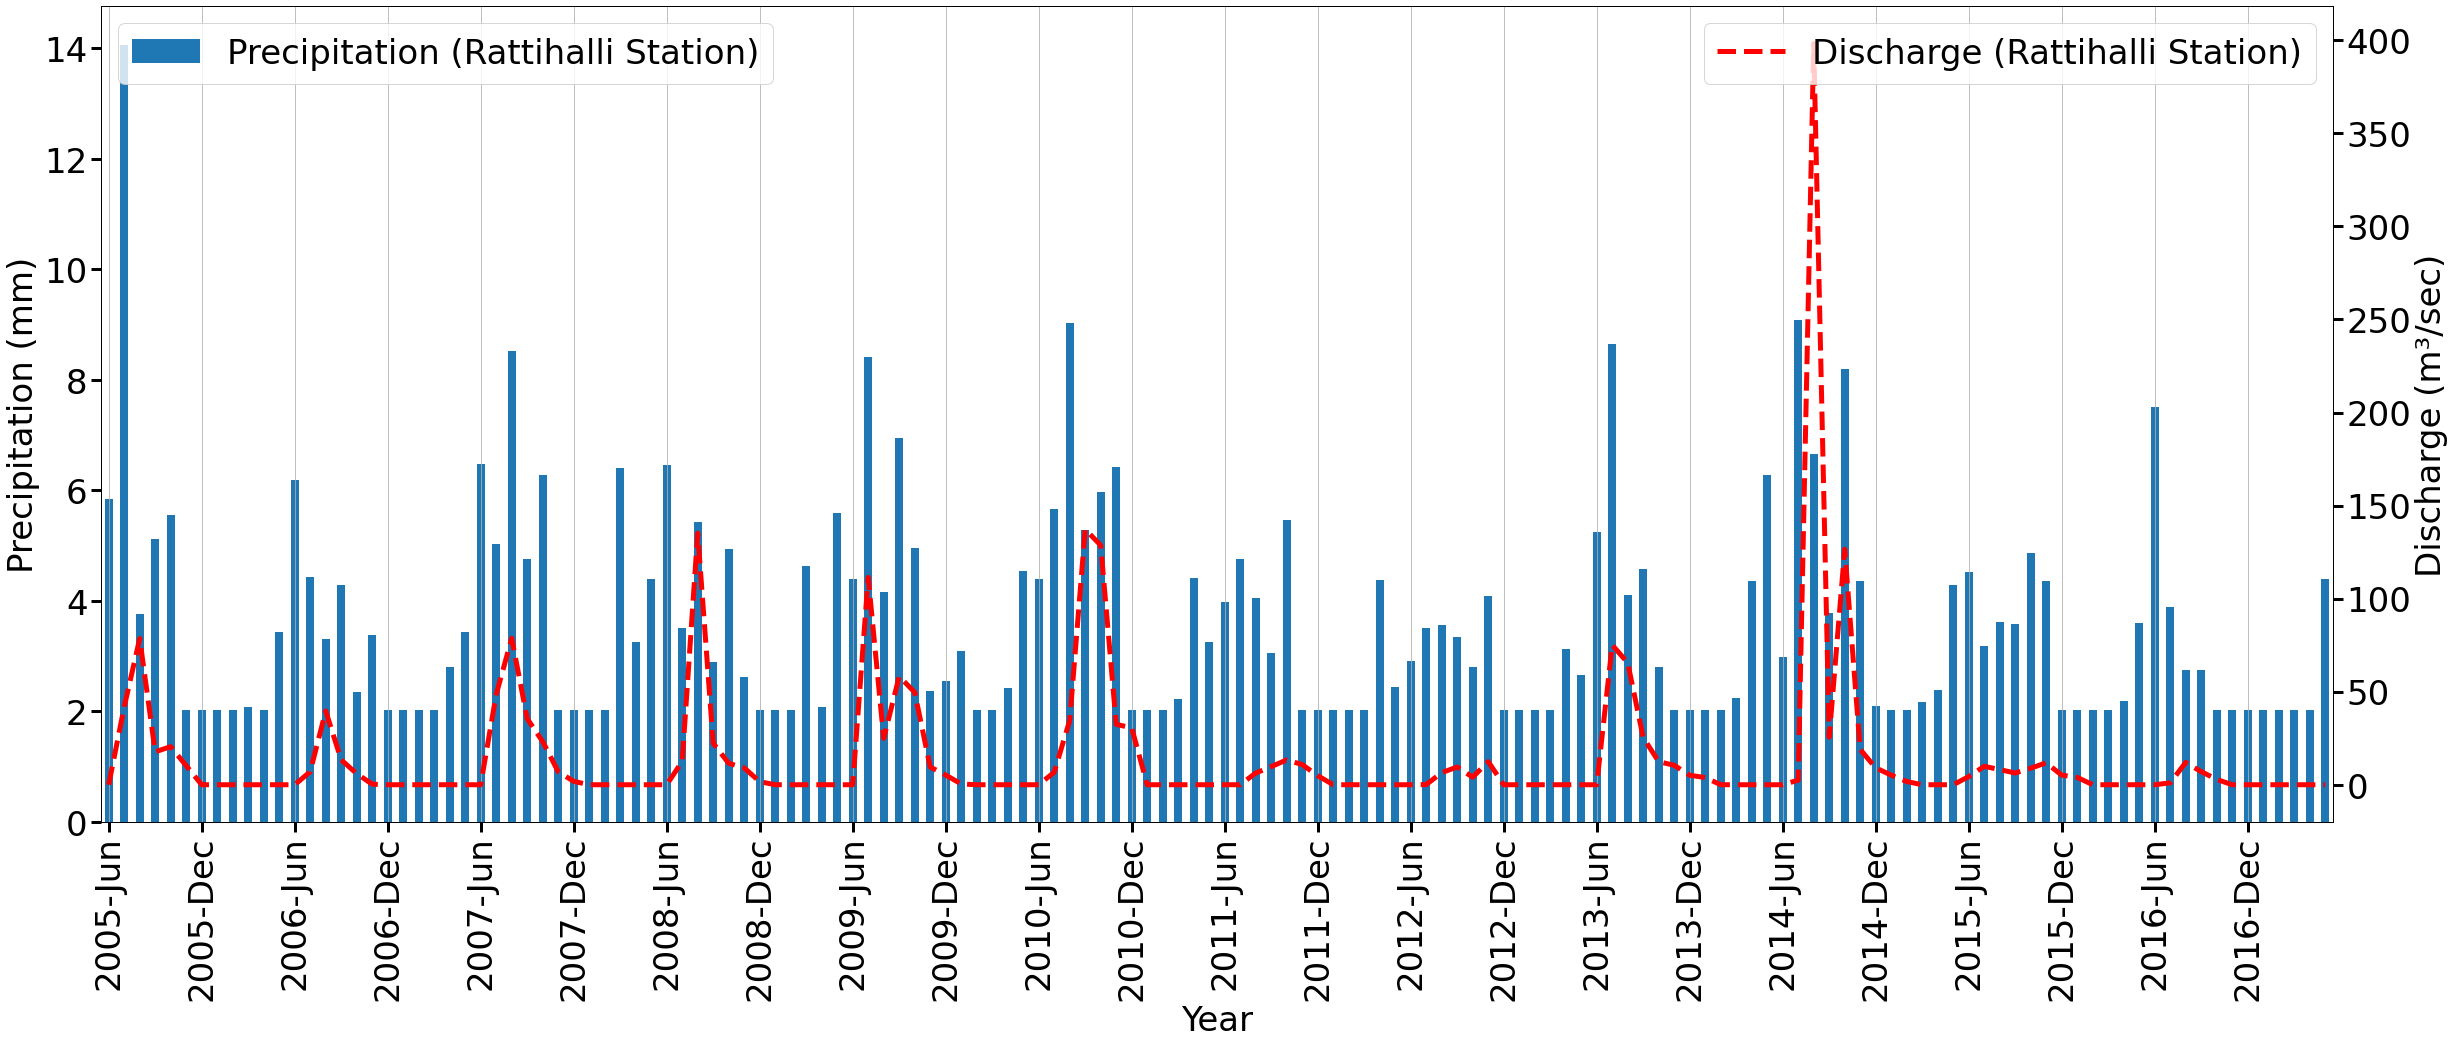

In [78]:

import matplotlib.dates as mdates


Ra_pdataset_yearly_sum1 = Ra_pdataset['Data'].resample('M').mean() 
Ra_dataset_yearly_sum1 = Ra_dataset['Item'].resample('M').mean() 

Ra_pdataset_yearly_sum1.index = Ra_pdataset_yearly_sum1.index.strftime('%Y-%b')
Ra_dataset_yearly_sum1.index = Ra_dataset_yearly_sum1.index.strftime('%Y-%b')

df = pd.DataFrame({#'Precipitation (Balehonnur Station)': Ra_pdataset_yearly_sum1
                   'Precipitation (Rattihalli Station)': Ra_pdataset_yearly_sum1,
                   # 'Rattihalli Station': Ra_pdataset_yearly_sum
                  },index=Ra_pdataset_yearly_sum1.index)

ax = df.plot.bar(rot=0,figsize=(40,15),width=0.5)
ax2 = ax.twinx()
Ra_dataset_yearly_sum1.plot(label='Discharge (Rattihalli Station)',kind='line', secondary_y=True, ax=ax2,color='red', linestyle='--', linewidth=5)

ax.legend(loc='upper left',fontsize=34)
ax.tick_params(labelsize=34)
ax.set_aspect('auto')
ax.set_ylabel('Precipitation (mm)', fontsize=34)
ax.set_xlabel('Year',fontsize=34)


plt.ylabel('Discharge (m\N{SUPERSCRIPT THREE}/sec)', fontsize=34)


ax.xaxis.set_tick_params(rotation=90)


plt.tick_params(labelsize=34)

ax2.set_ylabel('Discharge (m\N{SUPERSCRIPT THREE}/sec)', fontsize=34)

labels = [item.get_text() for item in ax.get_xticklabels()]

plt.xticks(np.arange(0, 144, 6), labels[::6])
ax.xaxis.grid()
plt.tick_params(which='major', length=10, width=3, direction='out')
ax.tick_params(which='major', length=10, width=3, direction='out')
plt.legend(loc='upper right',fontsize=34)
plt.show()



In [79]:
#Ba dataset
Ba_dataset_monthly_sum = Ba_dataset['Item'].resample('M').mean()
Ba_dataset_yearly_sum = Ba_dataset_monthly_sum.resample('A-MAY').mean()
Ba_dataset_yearly_mean = Ba_dataset_monthly_sum.mean()
Ba_dataset_yearly_SD = Ba_dataset_monthly_sum.std()

Ba_pdataset_monthly_sum = Ba_pdataset['Data'].resample('M').mean()
Ba_pdataset_yearly_mean = Ba_pdataset_monthly_sum.resample('A-MAY').mean()
Ba_pdataset_monthly_SD = Ba_pdataset_monthly_sum.std()
Ba_pdataset_monthly_mean = Ba_pdataset_monthly_sum.mean()

#Ho dataset
Ho_dataset_monthly_sum = Ho_dataset['Item'].resample('M').mean()
Ho_dataset_yearly_sum = Ho_dataset_monthly_sum.resample('A-MAY').mean()
Ho_dataset_yearly_mean = Ho_dataset_monthly_sum.mean()
Ho_dataset_yearly_SD = Ho_dataset_monthly_sum.std()

Ho_pdataset_monthly_sum = Ho_pdataset['Data'].resample('M').mean()
Ho_pdataset_yearly_mean = Ho_pdataset_monthly_sum.resample('A-MAY').mean()
Ho_pdataset_monthly_SD = Ho_pdataset_monthly_sum.std()
Ho_pdataset_monthly_mean = Ho_pdataset_monthly_sum.mean()


#Ra dataset
Ra_dataset_monthly_sum = Ra_dataset['Item'].resample('M').mean()
Ra_dataset_yearly_sum = Ra_dataset_monthly_sum.resample('A-MAY').mean()
Ra_dataset_yearly_mean = Ra_dataset_monthly_sum.mean()
Ra_dataset_yearly_SD = Ra_dataset_monthly_sum.std()

Ra_pdataset_monthly_sum = Ra_pdataset['Data'].resample('M').mean()
Ra_pdataset_yearly_mean = Ra_pdataset_monthly_sum.resample('A-MAY').mean()
Ra_pdataset_monthly_SD = Ra_pdataset_monthly_sum.std()
Ra_pdataset_monthly_mean = Ra_pdataset_monthly_sum.mean()



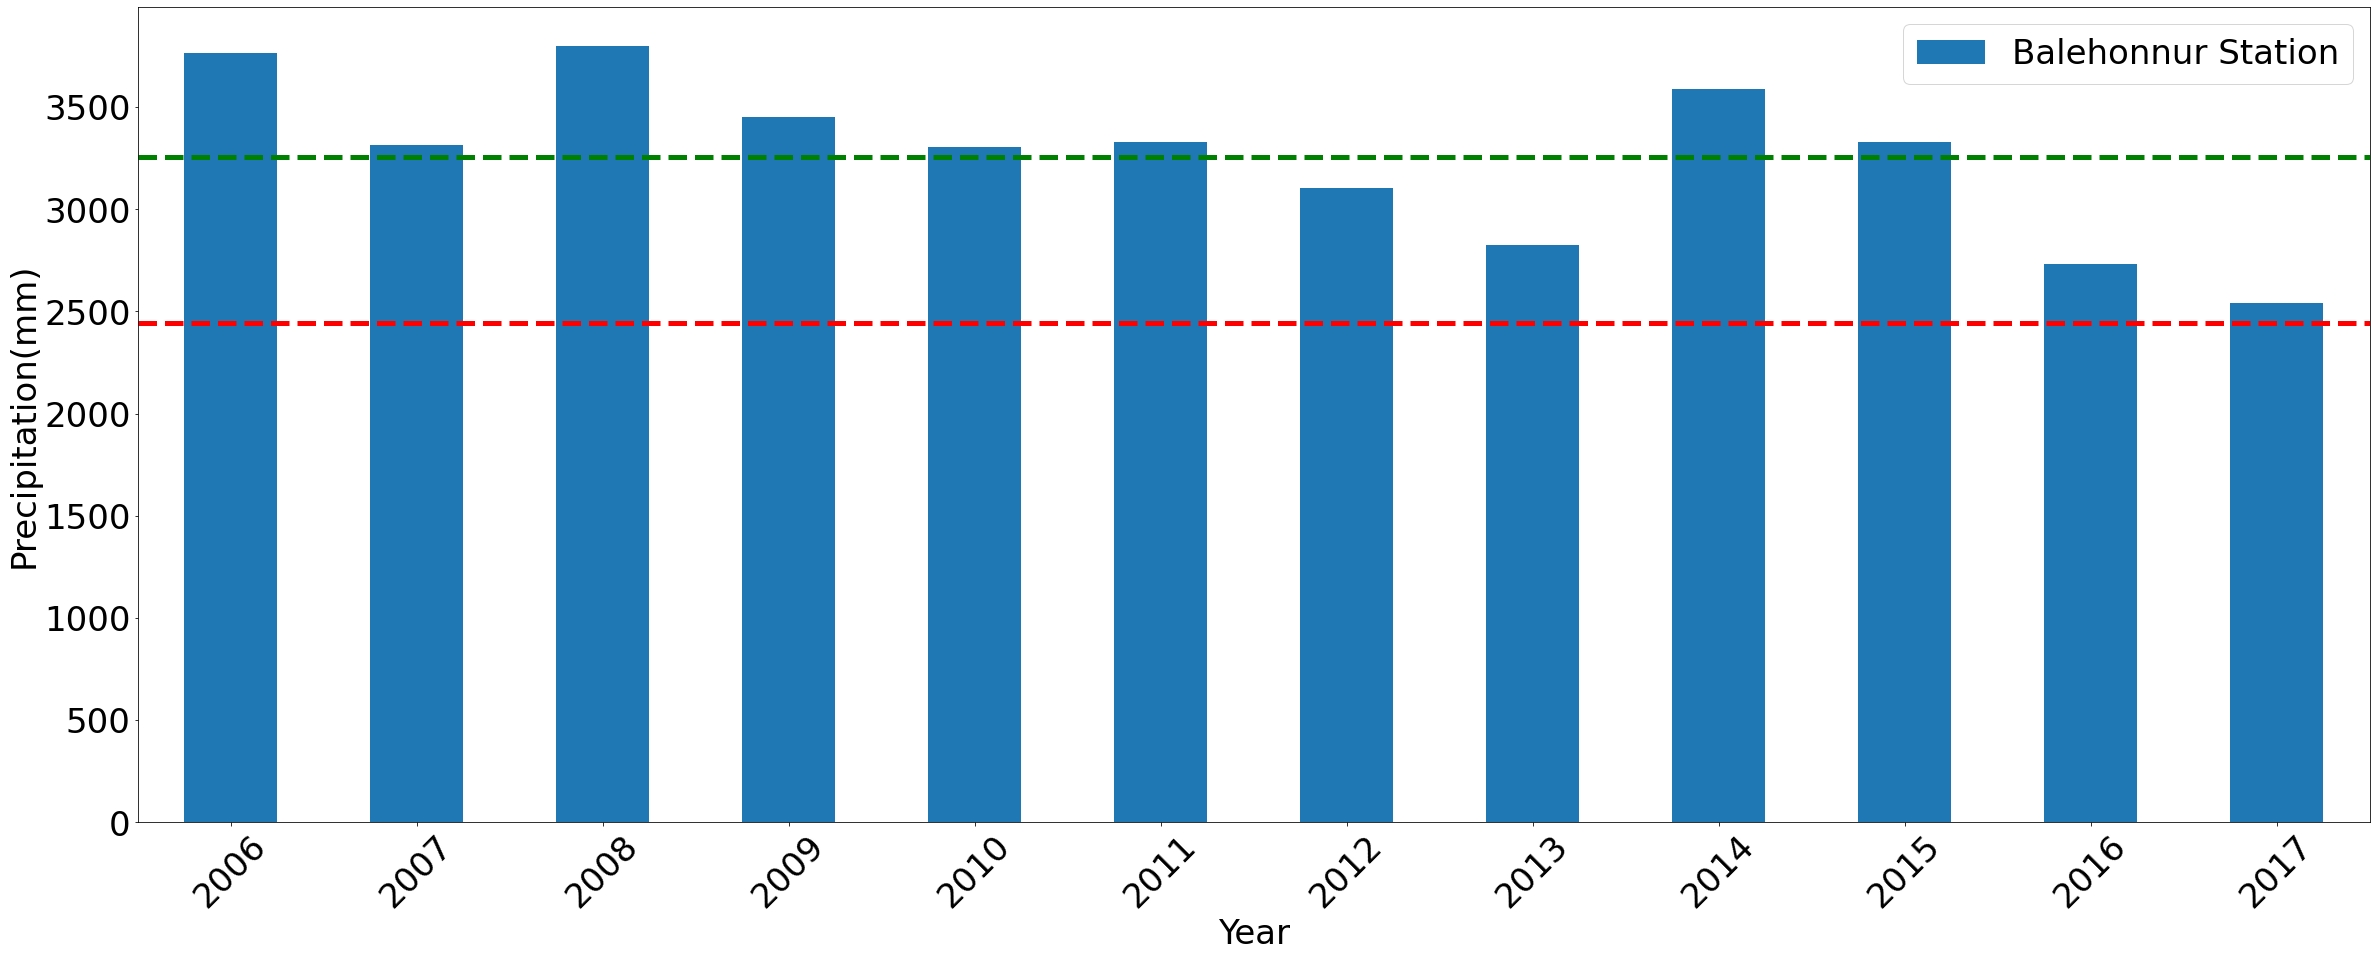

In [80]:
Ba_dataset = Ba_dataset.loc['2005-06-01': '2017-05-31']
Ba_pdataset = Ba_pdataset.loc['2005-06-01': '2017-05-31']

Ho_dataset = Ho_dataset.loc['2005-06-01': '2017-05-31']
Ho_pdataset = Ho_pdataset.loc['2005-06-01': '2017-05-31']

Ra_dataset = Ra_dataset.loc['2005-06-01': '2017-05-31']
Ra_pdataset = Ra_pdataset.loc['2005-06-01': '2017-05-31']

Ba_pdataset_yearly_sum = Ba_pdataset['Data'].resample('A-MAY').sum()
Ba_pdataset_average = Ba_pdataset_yearly_sum.mean()
Ho_pdataset_yearly_sum = Ho_pdataset['Data'].resample('A-MAY').sum()
Ho_pdataset_average = Ho_pdataset_yearly_sum.mean()
Ra_pdataset_yearly_sum = Ra_pdataset['Data'].resample('A-MAY').sum()
Ra_pdataset_average = Ra_pdataset_yearly_sum.mean()
import matplotlib.dates as mdates
Ba_pdataset_yearly_sum.index = Ba_pdataset_yearly_sum.index.strftime('%Y')
Ho_pdataset_yearly_sum.index = Ho_pdataset_yearly_sum.index.strftime('%Y')
Ra_pdataset_yearly_sum.index = Ra_pdataset_yearly_sum.index.strftime('%Y')

df = pd.DataFrame({'Balehonnur Station': Ba_pdataset_yearly_sum
                   #'Hosaritti Station': Ho_pdataset_yearly_sum,
                   # 'Rattihalli Station': Ra_pdataset_yearly_sum
                  },index=Ba_pdataset_yearly_sum.index)

ax = df.plot.bar(rot=0,figsize=(40,15),width=0.5)
ax.legend(loc='upper Right',fontsize=34, ncol=3)
ax.tick_params(labelsize=34)
ax.set_aspect('auto')
ax.set_ylabel('Precipitation(mm)', fontsize=34)
ax.set_xlabel('Year',fontsize=34)
ax.format_xdata = mdates.DateFormatter('%Y')

ax.axhline(y=Ba_pdataset_average, color='green', linestyle='--', linewidth=5);
ax.axhline(y=0.75*Ba_pdataset_average, color='red', linestyle='--', linewidth=5);
#ax.grid(True,linestyle='--')
ax.xaxis.set_tick_params(rotation=45)

#ax.yaxis.set_ticks(np.arange(-0.8, 1.2, 0.2))


In [81]:
Ba_dataset_monthly_sum = Ba_dataset['Item'].resample('M').mean()
#dataset_monthly_sum = (dataset_monthly_sum[:] -dataset_monthly_sum.min())/(dataset_monthly_sum.max()-dataset_monthly_sum.min())

#dataset_yearly_sum = dataset_monthly_sum.groupby(dataset_monthly_sum.index.to_period('A-MAY')).cumsum().resample('A-MAY').sum()
Ba_dataset_yearly_sum = Ba_dataset_monthly_sum.resample('A-MAY').mean()

#dataset_yearly_SD = dataset_monthly_sum.groupby(dataset_monthly_sum.index.to_period('A-MAY')).cumsum().resample('A-MAY').std()
Ba_dataset_yearly_mean = Ba_dataset_monthly_sum.mean()
Ba_dataset_yearly_SD = Ba_dataset_monthly_sum.std()
#dataset_yearly_mean = dataset_monthly_sum.groupby(dataset_monthly_sum.index.to_period('A-MAY')).cumsum().resample('A-MAY').mean()

Ba_pdataset_monthly_sum = Ba_pdataset['Data'].resample('M').mean()
#pdataset_monthly_sum = (pdataset_monthly_sum[:] -pdataset_monthly_sum.min())/(pdataset_monthly_sum.max()-pdataset_monthly_sum.min())

Ba_pdataset_yearly_mean = Ba_pdataset_monthly_sum.resample('A-MAY').mean()

Ba_pdataset_monthly_SD = Ba_pdataset_monthly_sum.std()

Ba_pdataset_monthly_mean = Ba_pdataset_monthly_sum.mean()

# SPI & SDI

In [82]:
#Ba dataset
Ba_dataset = Ba_dataset.loc['2005-06-01': '2017-05-31']
Ba_pdataset = Ba_pdataset.loc['2005-06-01': '2017-05-31']

Ho_dataset = Ho_dataset.loc['2005-06-01': '2017-05-31']
Ho_pdataset = Ho_pdataset.loc['2005-06-01': '2017-05-31']

Ra_dataset = Ra_dataset.loc['2005-06-01': '2017-05-31']
Ra_pdataset = Ra_pdataset.loc['2005-06-01': '2017-05-31']

Ba_dataset_monthly_mean = Ba_dataset['Item'].resample('M').mean()

Ba_pdataset_monthly_mean = Ba_pdataset['Data'].resample('M').mean()

#Ho dataset
Ho_dataset_monthly_mean = Ho_dataset['Item'].resample('M').mean()

Ho_pdataset_monthly_mean = Ho_pdataset['Data'].resample('M').mean()

#Ra dataset
Ra_dataset_monthly_mean = Ra_dataset['Item'].resample('M').mean()

Ra_pdataset_monthly_mean = Ra_pdataset['Data'].resample('M').mean()

Ba_SDI = indices.spi(Ba_dataset_monthly_mean,12,indices.Distribution.gamma,data_year_start_monthly,data_year_start_monthly,data_year_end_monthly,compute.Periodicity.monthly)
Ba_SPI = indices.spi(Ba_pdataset_monthly_mean,12,indices.Distribution.gamma,data_year_start_monthly,data_year_start_monthly,data_year_end_monthly,compute.Periodicity.monthly)

Ho_SDI = indices.spi(Ho_dataset_monthly_mean,12,indices.Distribution.gamma,data_year_start_monthly,data_year_start_monthly,data_year_end_monthly,compute.Periodicity.monthly)
Ho_SPI = indices.spi(Ho_pdataset_monthly_mean,12,indices.Distribution.gamma,data_year_start_monthly,data_year_start_monthly,data_year_end_monthly,compute.Periodicity.monthly)

Ra_SDI = indices.spi(Ra_dataset_monthly_mean,12,indices.Distribution.gamma,data_year_start_monthly,data_year_start_monthly,data_year_end_monthly,compute.Periodicity.monthly)
Ra_SPI = indices.spi(Ra_pdataset_monthly_mean,12,indices.Distribution.gamma,data_year_start_monthly,data_year_start_monthly,data_year_end_monthly,compute.Periodicity.monthly)



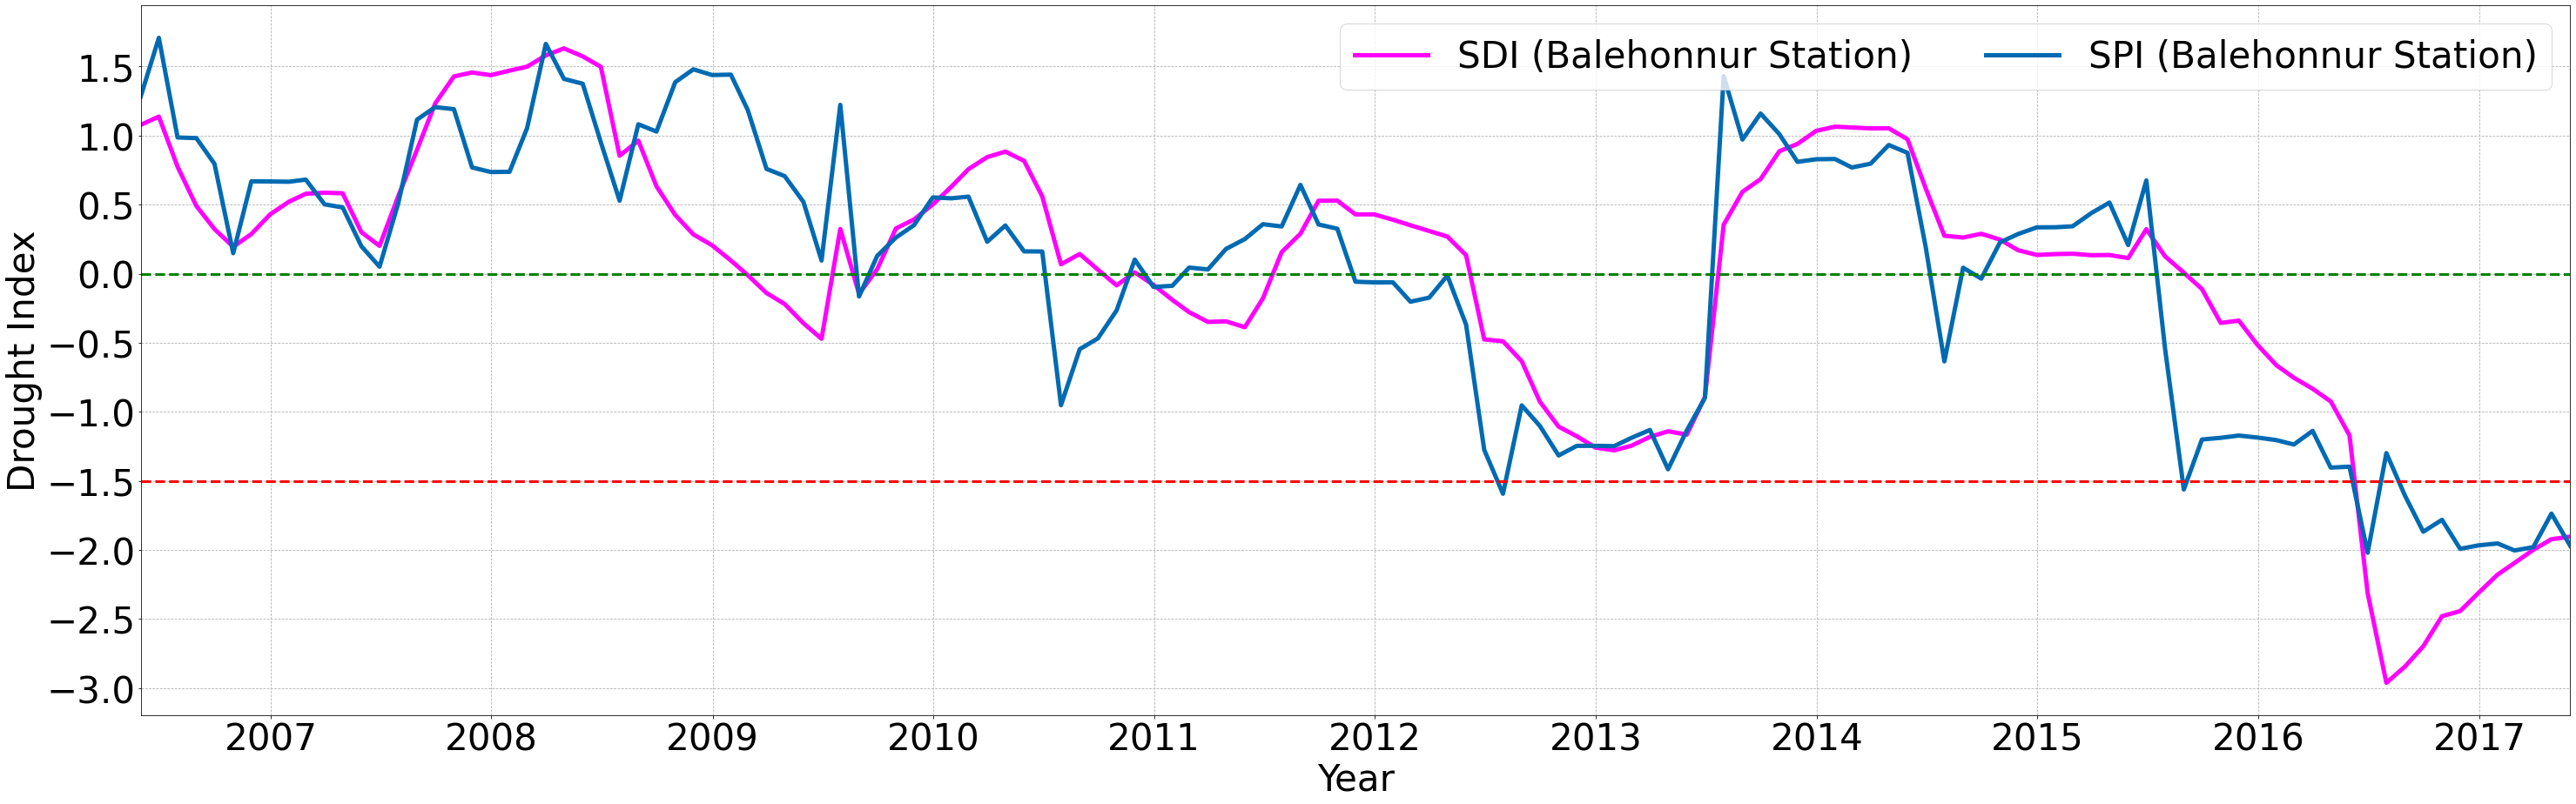

In [86]:

Period = pd.date_range(start='2005-06-01', periods=144, freq='M')

Ba_SDI=pd.DataFrame(index = Period,data=Ba_SDI)
Ba_SPI=pd.DataFrame(index = Period,data=Ba_SPI)

Ho_SDI=pd.DataFrame(index = Period,data=Ho_SDI)
Ho_SPI=pd.DataFrame(index = Period,data=Ho_SPI)

Ra_SDI=pd.DataFrame(index = Period,data=Ra_SDI)
Ra_SPI=pd.DataFrame(index = Period,data=Ra_SPI)


fig, ax = plt.subplots(figsize=(50, 15))
ax.xaxis.grid()

ax.plot(Ba_SDI, marker='o',markersize=0,label='SDI (Balehonnur Station)', lw=5,color='#FF00FF')
ax.plot(Ba_SPI, marker='o',markersize=0,label='SPI (Balehonnur Station)', lw=5,color='#006AB2')
ax.set_xlim([datetime.date(2006, 6, 1), datetime.date(2017, 5, 31)])


plt.legend(loc='upper right',fontsize=42,ncol=3)
plt.grid(True,linestyle='--')
plt.xlabel('Year', fontsize=42)
plt.ylabel('Drought Index', fontsize=42)
plt.axhline(y=0, color='green', linestyle='--', linewidth=3);
plt.axhline(y=-1.5, color='red', linestyle='--', linewidth=3);
plt.tick_params(labelsize=42)
plt.yticks(np.arange(-3.0, 2.0, 0.5))
plt.show()



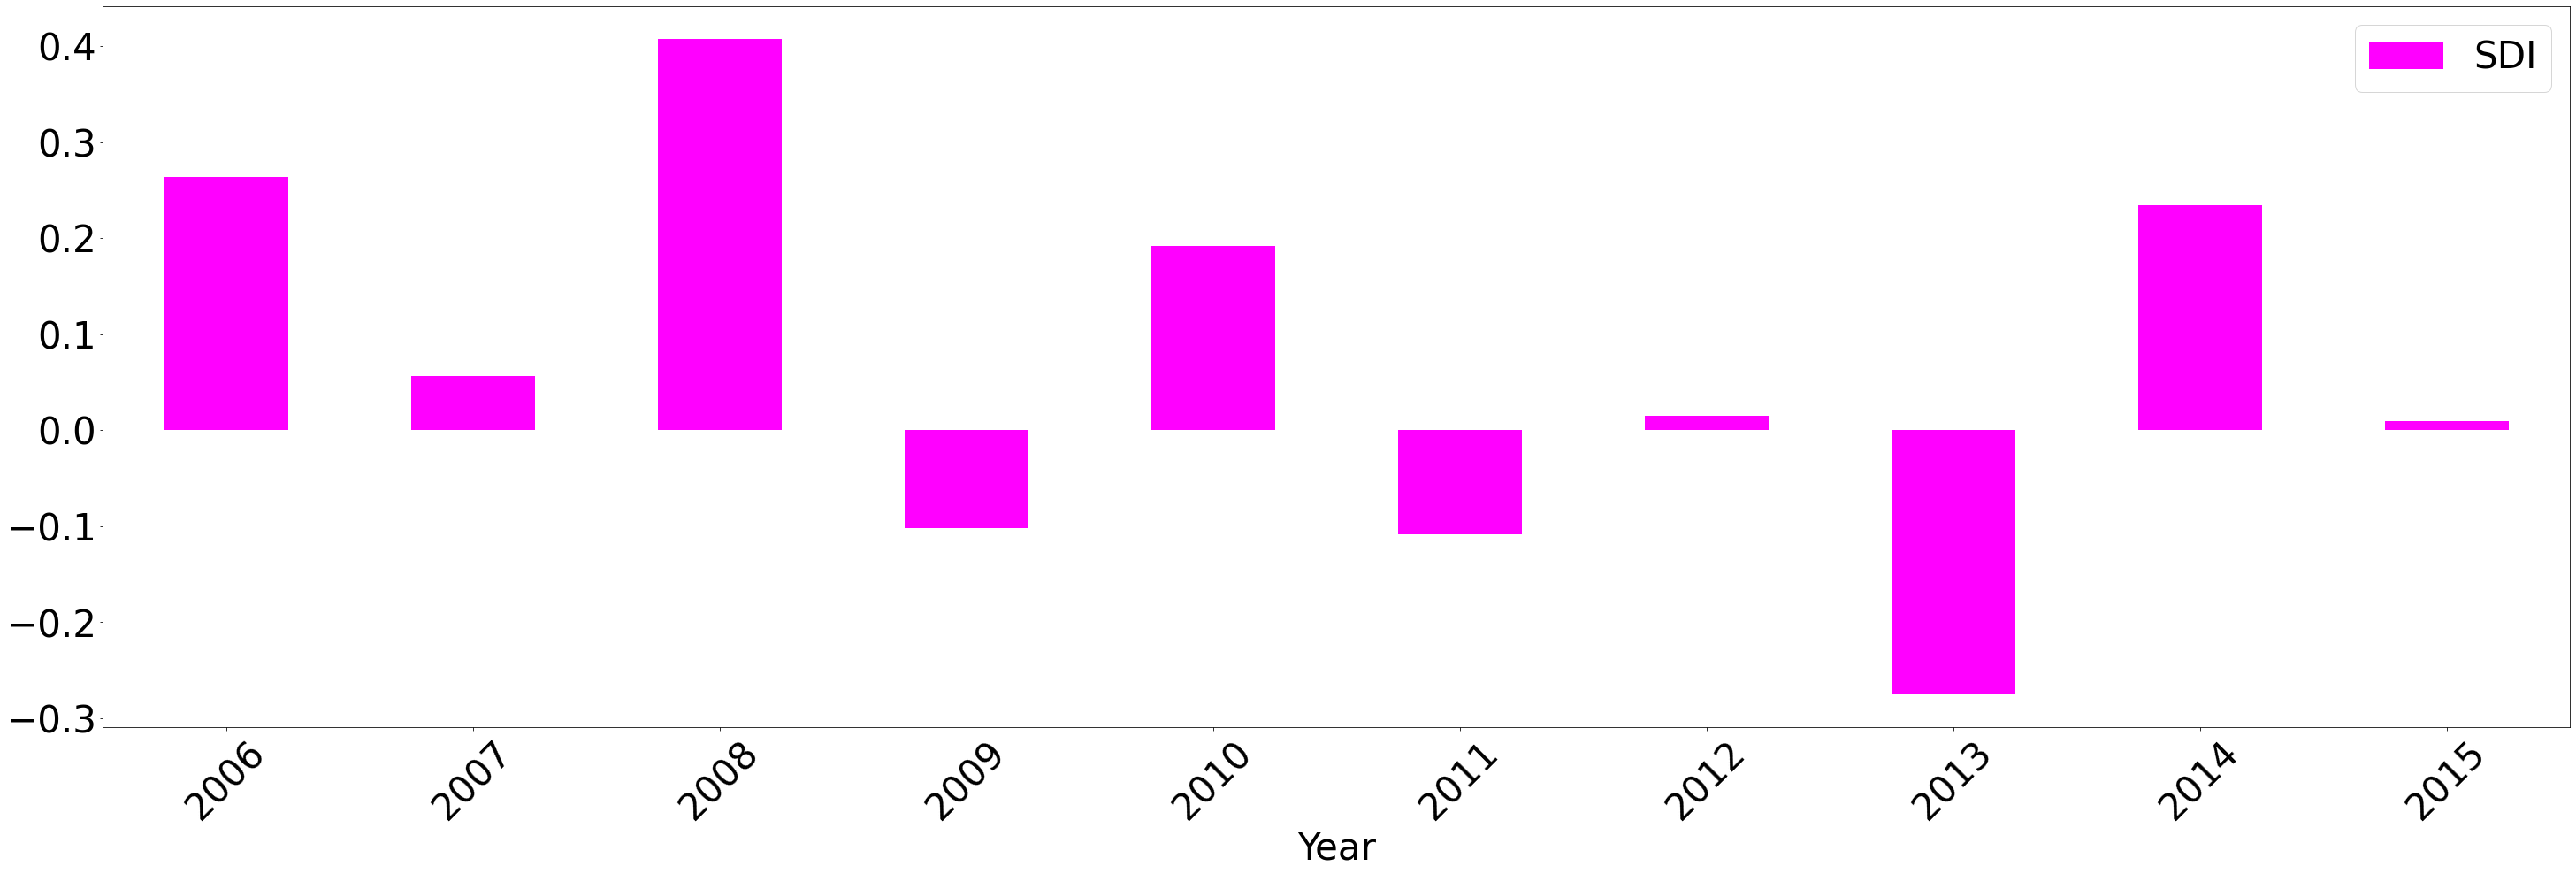

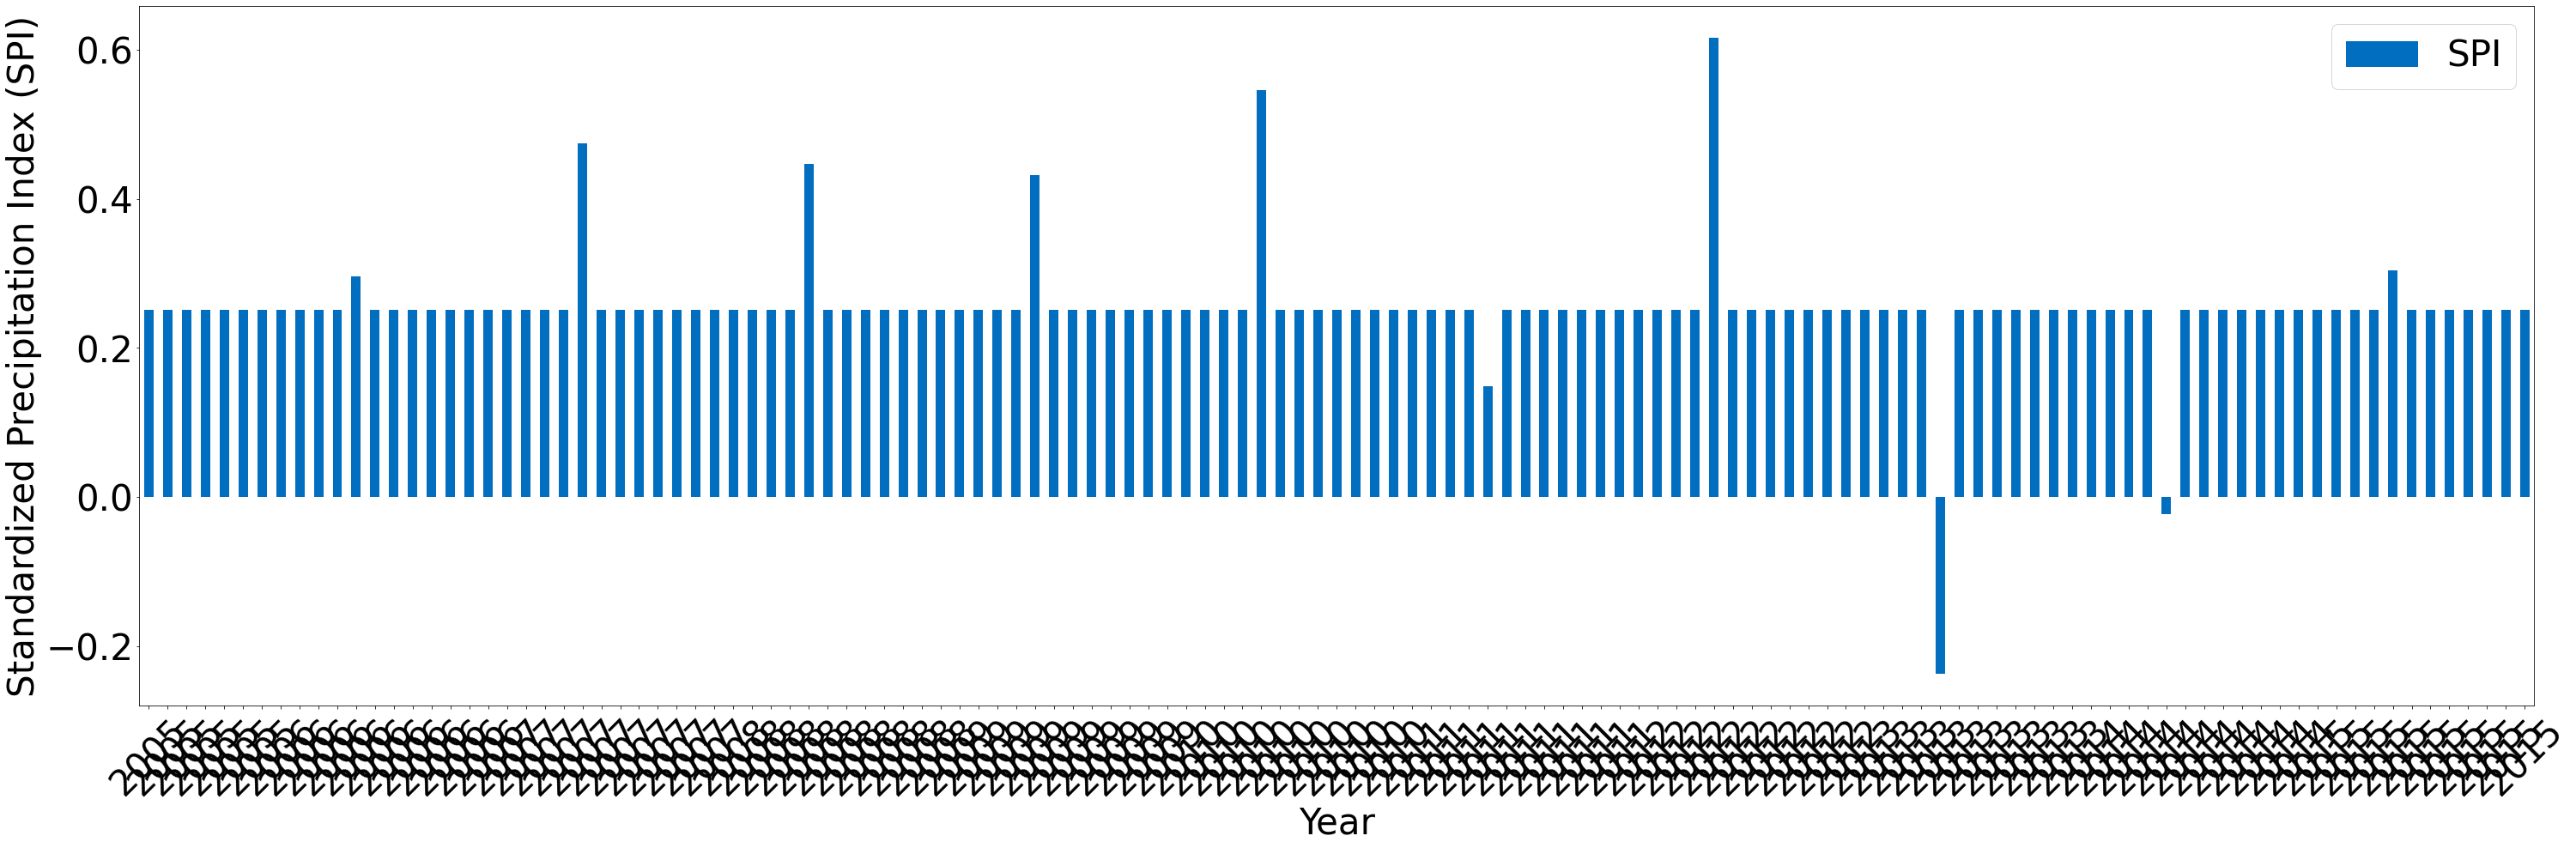

In [84]:

SDI = (Ba_dataset_yearly_sum[:] - Ba_dataset_yearly_mean)/Ba_dataset_yearly_SD
SPI = (Ba_pdataset_yearly_mean[:] - Ba_pdataset_monthly_mean)/Ba_pdataset_monthly_SD

SPI = SPI.fillna(SPI.mean())
SDI.index = SDI.index.strftime('%Y')
SPI.index = SPI.index.strftime('%Y')

fig, ax = plt.subplots(figsize=(50, 15))
#ax.xaxis.grid()
#ind = np.arange(len(SDI))
#width = 0.3


SDI.loc['1995-06': '2015-05'].plot.bar(ax=ax,color='#FF00FF',label = 'SDI')

#ax.set_xlim('01-06-1995', '31-05-2017')

#plt.ylabel('Streamflow Drought Index (SDI)', fontsize=42)
plt.legend(loc='upper right',fontsize=42)
plt.xlabel('Year', fontsize=42)
plt.tick_params(labelsize=42)
ax.xaxis.set_tick_params(rotation=45)

plt.show()

fig, ax1 = plt.subplots(figsize=(50, 15))
ax1.xaxis.grid()

SPI.loc['1995-06': '2015-05'].plot.bar(ax=ax1,color='#026EC0', label = 'SPI')
#ax1.set_xlim('01-01-1986', '31-12-2018')
#plt.yticks(np.arange(22, 40, 5))
plt.ylabel('Standardized Precipitation Index (SPI)', fontsize=42)
plt.xlabel('Year', fontsize=42)
plt.tick_params(labelsize=42)
plt.legend(loc='upper right',fontsize=42)
ax1.xaxis.set_tick_params(rotation=45)
plt.show()



